# Initial phases

## Initialisation

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from function_file import first_analysis
from function_file import cat_stats # had to add impor sns or plt in them
from function_file import num_stats # had to add impor sns or plt in them
from function_file import am_pm     # runs
from function_file import time_step # strangely unstable (need possibly to add import ... pd in the .py file)
from function_file import clean     # to test

%matplotlib inline
# note: when there is a % it is not really python, in this example we tell the system not to open another window when doing 
# matplotlib

## Loading the Dataset

In [ ]:
df_demo = pd.read_csv('df_final_demo.txt', delimiter=',') 
df_exp_clients = pd.read_csv('df_final_experiment_clients.txt', delimiter=',')
df_data_pt_1 = pd.read_csv('df_final_web_data_pt_1.txt', delimiter=',')
df_data_pt_2 = pd.read_csv('df_final_web_data_pt_2.txt')


## Initial Exploration

Using the first_analysis

In [ ]:
first_analysis(df_demo) # using the file from our .py file

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0


Index(['client_id', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'gendr',
       'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth'],
      dtype='object')

'shape: (70609, 9)'

client_id             int64
clnt_tenure_yr      float64
clnt_tenure_mnth    float64
clnt_age            float64
gendr                object
num_accts           float64
bal                 float64
calls_6_mnth        float64
logons_6_mnth       float64
dtype: object

Looking for null values: 
clnt_age            15
clnt_tenure_yr      14
clnt_tenure_mnth    14
gendr               14
num_accts           14
bal                 14
calls_6_mnth        14
logons_6_mnth       14
client_id            0
dtype: int64


In [ ]:
first_analysis(df_exp_clients)

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control


Index(['client_id', 'Variation'], dtype='object')

'shape: (70609, 2)'

client_id     int64
Variation    object
dtype: object

Looking for null values: 
Variation    20109
client_id        0
dtype: int64


In [ ]:
first_analysis(df_data_pt_1)
first_analysis(df_data_pt_2)

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04


Index(['client_id', 'visitor_id', 'visit_id', 'process_step', 'date_time'], dtype='object')

'shape: (343141, 5)'

client_id        int64
visitor_id      object
visit_id        object
process_step    object
date_time       object
dtype: object

Looking for null values: 
client_id       0
visitor_id      0
visit_id        0
process_step    0
date_time       0
dtype: int64


,client_id,visitor_id,visit_id,process_step,date_time
0,763412,601952081_10457207388,397475557_40440946728_419634,confirm,2017-06-06 08:56:00
1,6019349,442094451_91531546617,154620534_35331068705_522317,confirm,2017-06-01 11:59:27
2,6019349,442094451_91531546617,154620534_35331068705_522317,step_3,2017-06-01 11:58:48
3,6019349,442094451_91531546617,154620534_35331068705_522317,step_2,2017-06-01 11:58:08
4,6019349,442094451_91531546617,154620534_35331068705_522317,step_1,2017-06-01 11:57:58


Index(['client_id', 'visitor_id', 'visit_id', 'process_step', 'date_time'], dtype='object')

'shape: (412264, 5)'

client_id        int64
visitor_id      object
visit_id        object
process_step    object
date_time       object
dtype: object

Looking for null values: 
client_id       0
visitor_id      0
visit_id        0
process_step    0
date_time       0
dtype: int64


## 1st Conclusions

- All the data types seem to be properly defined
- From the 4 tables, all have client_id, we could:
       - merge the two with 70609 lines together on the client_id, 
       - and concatenate the 2 others
       - some missing values 14-15 in the clients details, still to keep the data so far 
       - to clean the lines with no Variation (NaN) - to change the name of the columns all in small fonts 
# what is the use of visitor_id vs visit_id + client_id ?
# to check for duplicates after the merge/concat 

# EDA  & Data Cleaning

Exploring numerical and categorical variables

## Preparing the data

Merge and Concat

In [ ]:
# A to merge the two first files on client_id, and check the data (nulls, columns...) => to remove the 'useless columns'
# possibly to convert the numerical ones in int instead of float if needed
# B to concat the two last files on top of each other and check for duplicates... before organising the categories

In [ ]:
df1 = pd.merge(df_exp_clients, df_demo, how = 'outer', on = 'client_id') # outer to keep the 15 empty values in case of
df2 = pd.concat([df_data_pt_1, df_data_pt_2])
display(df1)
display(df2)

,client_id,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,9988021,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
1,8320017,Test,22.0,274.0,34.5,M,2.0,36001.90,5.0,8.0
2,4033851,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0
3,1982004,Test,6.0,80.0,44.5,U,2.0,30231.76,1.0,4.0
4,9294070,Control,5.0,70.0,29.0,U,2.0,34254.54,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...
70604,2443347,NaN,17.0,204.0,52.5,M,3.0,164693.48,7.0,7.0
70605,8788427,NaN,10.0,121.0,59.5,M,2.0,203149.13,3.0,3.0
70606,266828,NaN,14.0,172.0,60.5,M,2.0,1135068.68,7.0,7.0
70607,1266421,NaN,13.0,164.0,33.0,M,3.0,27701.79,2.0,3.0


,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
412259,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
412260,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
412261,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
412262,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


## Data Cleaning

Checking for null values or columns to drop, A & B, removing duplicates

In [ ]:
df2 = df2.drop_duplicates().reset_index(drop = True) # removing the duplicates

In [ ]:
display(df1.nunique()) # checking if the columns should be categorical or numerical, and checking if there are Nas
df1.nunique(dropna=False)

client_id           70609
Variation               2
clnt_tenure_yr         54
clnt_tenure_mnth      482
clnt_age              165
gendr                   4
num_accts               8
bal                 70328
calls_6_mnth            8
logons_6_mnth           9
dtype: int64

client_id           70609
Variation               3
clnt_tenure_yr         55
clnt_tenure_mnth      483
clnt_age              166
gendr                   5
num_accts               9
bal                 70329
calls_6_mnth            9
logons_6_mnth          10
dtype: int64

In [ ]:
display(df2.nunique()) # checking if the columns should be categorical or numerical, and checking if there are Nas
df2.nunique(dropna=False)

client_id       120157
visitor_id      130236
visit_id        158095
process_step         5
date_time       629363
dtype: int64

client_id       120157
visitor_id      130236
visit_id        158095
process_step         5
date_time       629363
dtype: int64

In [ ]:
numerical_df1 = ['clnt_tenure_yr','clnt_tenure_mnth','clnt_age', 'bal']
categorical_df1= ['client_id', 'Variation', 'gendr', 'num_accts', 'calls_6_mnth', 'logons_6_mnth']

df2.process_step.value_counts()

process_step
start      234999
step_1     162797
step_2     132750
step_3     111589
confirm    102506
Name: count, dtype: int64

Drop the lines with no value for variation in df1 then df2

In [ ]:
df1.dropna(subset='Variation',inplace=True)

In [ ]:
df1.reset_index(drop = True)

,client_id,Variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,9988021,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
1,8320017,Test,22.0,274.0,34.5,M,2.0,36001.90,5.0,8.0
2,4033851,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0
3,1982004,Test,6.0,80.0,44.5,U,2.0,30231.76,1.0,4.0
4,9294070,Control,5.0,70.0,29.0,U,2.0,34254.54,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...
50495,393005,Control,15.0,191.0,52.5,M,2.0,60344.67,1.0,4.0
50496,2908510,Control,21.0,252.0,34.0,M,3.0,141808.05,6.0,9.0
50497,7230446,Test,6.0,74.0,62.0,M,2.0,58778.11,2.0,5.0
50498,5230357,Test,23.0,278.0,30.5,M,2.0,61349.70,0.0,3.0


In [ ]:
mask = df2['client_id'].isin(df1['client_id'].value_counts().index)
df2 = df2[mask]

In [ ]:
df1['client_id'].value_counts().index

Index([9988021, 3303323, 4417464, 2920915, 6817705, 3845120, 1328700,  741912,
       2606880,  789856,
       ...
       7831891, 1109184, 5829295, 3058849, 4686729, 2533218, 9408108, 6637097,
       1640513, 6334360],
      dtype='int64', name='client_id', length=50500)

Last clean up: renaming the columns of df1 (Variation => variation, bal => balance)

In [ ]:
# # Cleaned gendr (X becomes U)
df1.gendr = df1.gendr.str.replace("X","U")

# Correcting the titles in df1: Variation => variation and bal => balance
df1.rename(columns={'Variation': 'variation', 'bal':'balance'}, inplace=True)
df1.head()

,client_id,variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,balance,calls_6_mnth,logons_6_mnth
0,9988021,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
1,8320017,Test,22.0,274.0,34.5,M,2.0,36001.90,5.0,8.0
2,4033851,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0
3,1982004,Test,6.0,80.0,44.5,U,2.0,30231.76,1.0,4.0
4,9294070,Control,5.0,70.0,29.0,U,2.0,34254.54,0.0,3.0


## Looking at categorical data

Using the function cat_stats

In [ ]:
 # to keep as long as not working via the function_file.py (Javier)
def cat_stats(df, column):
    """Function to generate the statistical data for categorical columns"""
    print(f'****** Brief analysis of {column} *****')
    frequency_table = df[column].value_counts()
    # Calculating the proportion of each unique value 
    proportion_table = df[column].value_counts(normalize=True)
    display(frequency_table, proportion_table)
      
    mode_col = df[column].mode()
    display(f'mode = {mode_col}')
          
    # Plotting a count plot for the 'MSZoning' column from the dataframe 'df', using the "Set3" palette for coloring
    sns.countplot(data=df, x= column, palette="Set1")
    plt.show()

****** Brief analysis of variation *****


variation
Test       26968
Control    23532
Name: count, dtype: int64

variation
Test       0.53402
Control    0.46598
Name: proportion, dtype: float64

'mode = 0    Test\nName: variation, dtype: object'

/root/work/function_file.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x= column, palette="Set1")


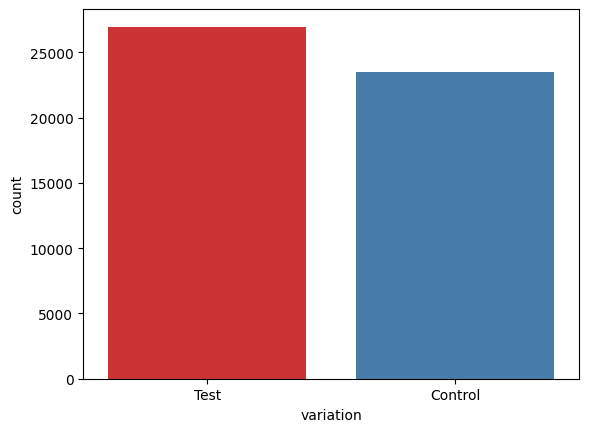

****** Brief analysis of gendr *****


gendr
U    17282
M    16947
F    16259
Name: count, dtype: int64

gendr
U    0.342299
M    0.335664
F    0.322037
Name: proportion, dtype: float64

'mode = 0    U\nName: gendr, dtype: object'

/root/work/function_file.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x= column, palette="Set1")


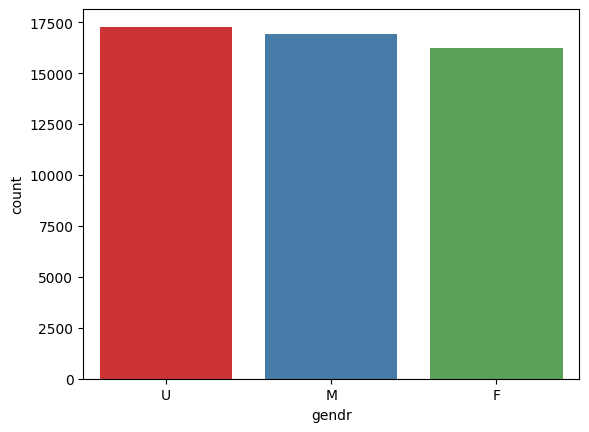

****** Brief analysis of num_accts *****


num_accts
2.0    39721
3.0     8947
4.0     1585
5.0      205
6.0       23
7.0        6
1.0        1
Name: count, dtype: int64

num_accts
2.0    0.786741
3.0    0.177210
4.0    0.031394
5.0    0.004060
6.0    0.000456
7.0    0.000119
1.0    0.000020
Name: proportion, dtype: float64

'mode = 0    2.0\nName: num_accts, dtype: float64'

/root/work/function_file.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x= column, palette="Set1")


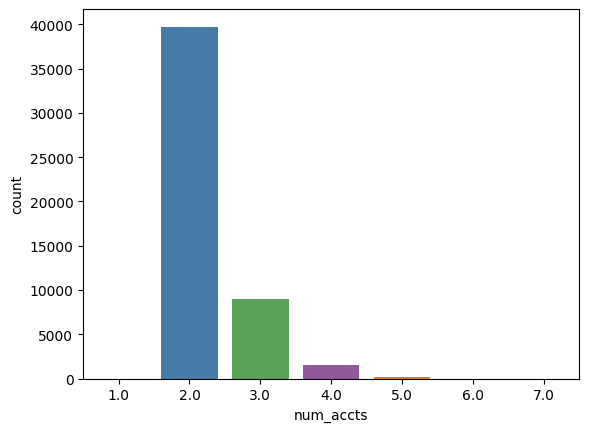

****** Brief analysis of calls_6_mnth *****


calls_6_mnth
6.0    12225
1.0     7908
0.0     7732
2.0     7215
3.0     5853
4.0     4848
5.0     4707
Name: count, dtype: int64

calls_6_mnth
6.0    0.242137
1.0    0.156631
0.0    0.153145
2.0    0.142905
3.0    0.115929
4.0    0.096023
5.0    0.093230
Name: proportion, dtype: float64

'mode = 0    6.0\nName: calls_6_mnth, dtype: float64'

/root/work/function_file.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x= column, palette="Set1")


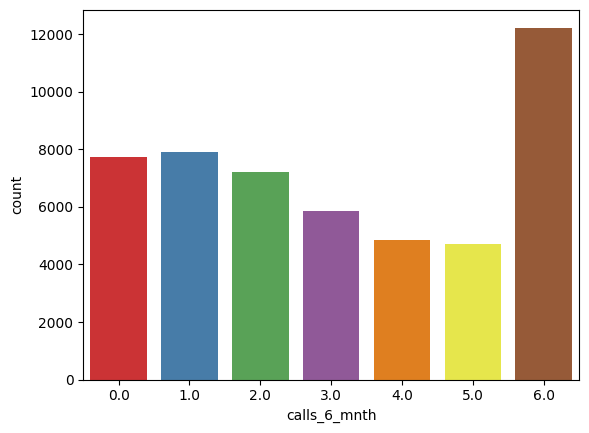

****** Brief analysis of logons_6_mnth *****


logons_6_mnth
9.0    12350
4.0     7855
3.0     7311
5.0     7283
6.0     5965
7.0     4914
8.0     4810
Name: count, dtype: int64

logons_6_mnth
9.0    0.244613
4.0    0.155582
3.0    0.144807
5.0    0.144252
6.0    0.118147
7.0    0.097330
8.0    0.095270
Name: proportion, dtype: float64

'mode = 0    9.0\nName: logons_6_mnth, dtype: float64'

/root/work/function_file.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x= column, palette="Set1")


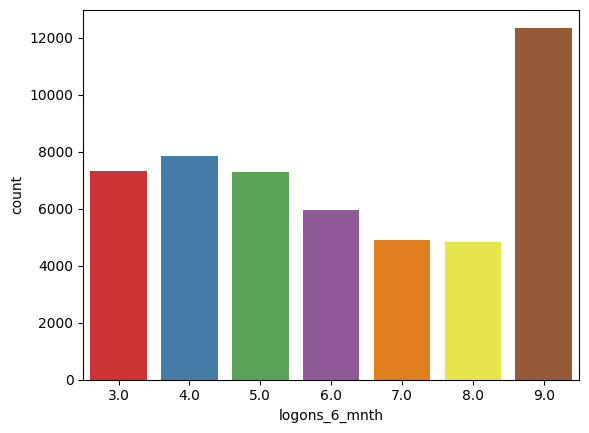

In [ ]:
numerical_df1 = ['clnt_tenure_yr','clnt_tenure_mnth','clnt_age', 'balance']
categorical_df1= ['variation', 'gendr', 'num_accts', 'calls_6_mnth', 'logons_6_mnth'] # removed client_id that was not relevant

for col in categorical_df1:
    cat_stats(df1, col)  

Food for thought:
- Variation: 50K values, 53 and 47%
- Gender: 4 unique values, X is likely to be U = unknown
- Number of accounts: 2-3-4 are close to 100%
- Freq of calls over 6 mths: no comments
- Number of connections for 6 months: no comments

## Looking at numerical data df1

Numerical variables, df1 and df2: Summary Statistics - Centrality and Dispersion Measures / Shape of distribution / boxplots...
Using our function num_stats

In [ ]:
# to keep as long as not working via the function_file.py (Javier) -ot gives an intermittent error sometimes
# it works other times no, so was kept to run the code
def num_stats(df, column):
    """Function to generate the statistical data for numerical columns à la describe with mode in addition"""
    print(f'****** Brief Analysis of {column} *****')
          
    mean_col = df[column].mean().round()
    median_col = df[column].median()
    mode_col = df[column].mode()[0]
    variance_col = round(df[column].var(),2)
    std_dev_col = round(df[column].std(),2)
    min_col = df[column].min()
    max_col = df[column].max()
    range_col = max_col - min_col
    quantiles_col = df[column].quantile([0.25, 0.5, 0.75])

    print(f'mean= {mean_col}, median= {median_col}, mode= {mode_col}')
    print(f'var = {variance_col}, std_dev = {std_dev_col}, min = {min_col}, max = {max_col}, range = {range_col}')
    print(f'quantiles : \n{quantiles_col}')
    
    # Plotting a histogram for the column of the 'data' dataframe
    # 'bins=30' divides the data into 30 bins for more detailed granularity
    sns.histplot(df[column], kde=True, bins=30, color="blue")
    plt.show()  # to show the plot as it goes!
    sns.boxplot(data = df[column], color="lightgreen")
    plt.show()  # to show the plot as it goes!


****** Brief Analysis of clnt_tenure_yr *****
mean= 12.0, median= 11.0, mode= 6.0
var = 47.06, std_dev = 6.86, min = 2.0, max = 55.0, range = 53.0
quantiles : 
0.25     6.0
0.50    11.0
0.75    16.0
Name: clnt_tenure_yr, dtype: float64


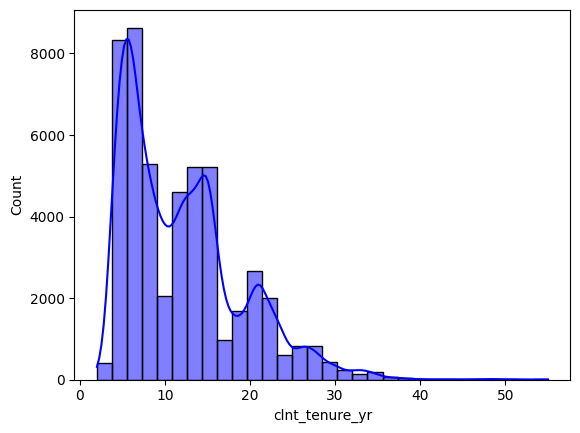

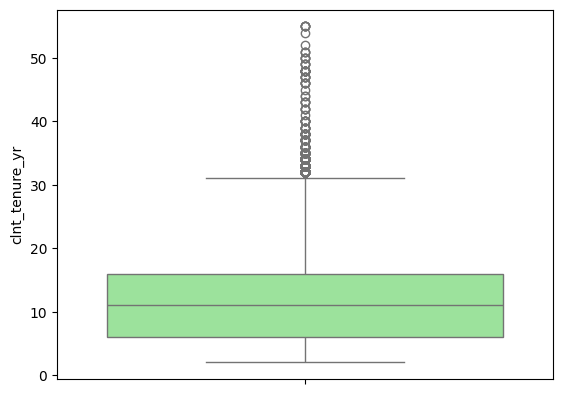

****** Brief Analysis of clnt_tenure_mnth *****
mean= 150.0, median= 136.0, mode= 58.0
var = 6714.96, std_dev = 81.94, min = 33.0, max = 669.0, range = 636.0
quantiles : 
0.25     82.0
0.50    136.0
0.75    192.0
Name: clnt_tenure_mnth, dtype: float64


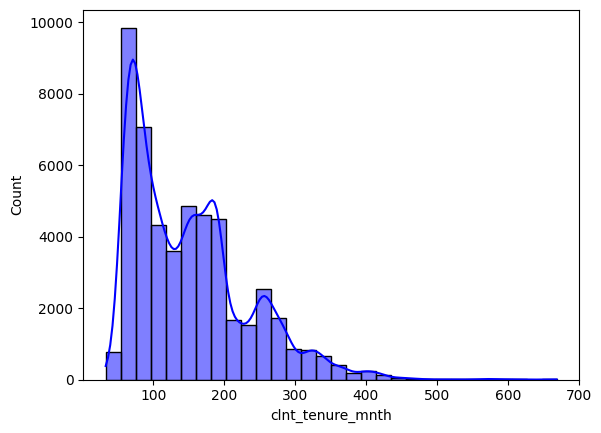

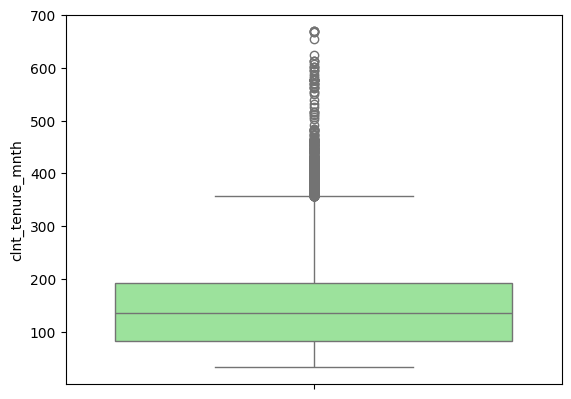

****** Brief Analysis of clnt_age *****
mean= 47.0, median= 48.0, mode= 58.5
var = 240.83, std_dev = 15.52, min = 17.0, max = 96.0, range = 79.0
quantiles : 
0.25    33.5
0.50    48.0
0.75    59.5
Name: clnt_age, dtype: float64


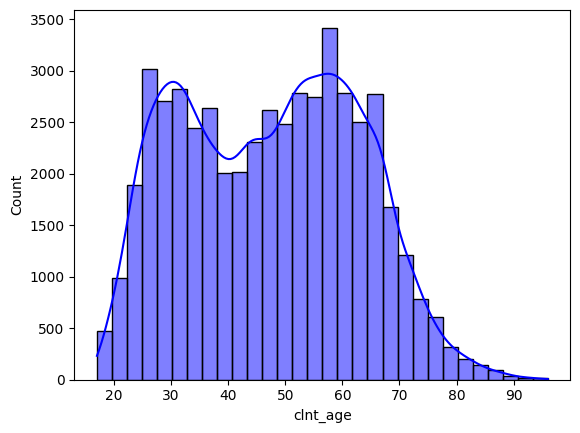

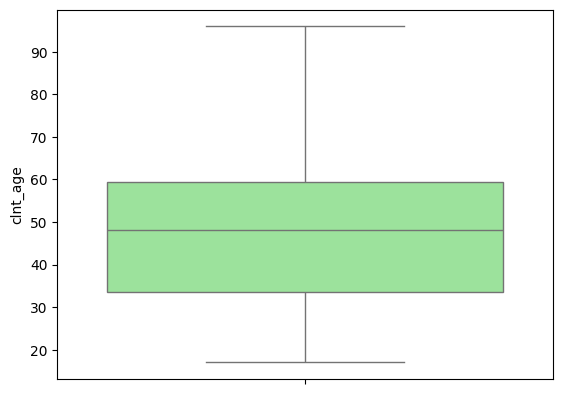

****** Brief Analysis of balance *****
mean= 149515.0, median= 65733.6, mode= 31188.62
var = 91225996839.69, std_dev = 302036.42, min = 23789.44, max = 16320040.15, range = 16296250.71
quantiles : 
0.25     39878.4075
0.50     65733.6000
0.75    139956.5450
Name: balance, dtype: float64


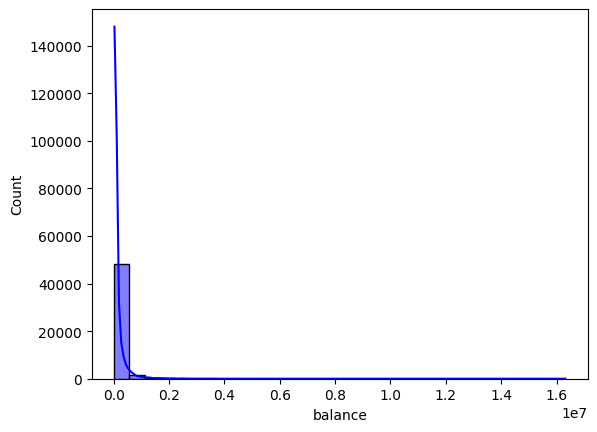

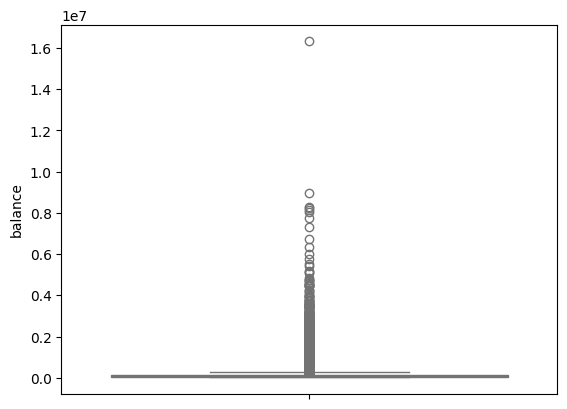

In [ ]:
for col in numerical_df1:
    num_stats(df1, col)

Comments:
- Client tenure: outliers above 36 years?, skewed right
- Client age: seems like two modes...(2 peaks), no outliers,
- balance: there are some millionaires that skew the data to the right, we might clean the very high values
- mode, median and mean are respectively 31K, 63K, 147K

Additional Visualisation (more histrograms)

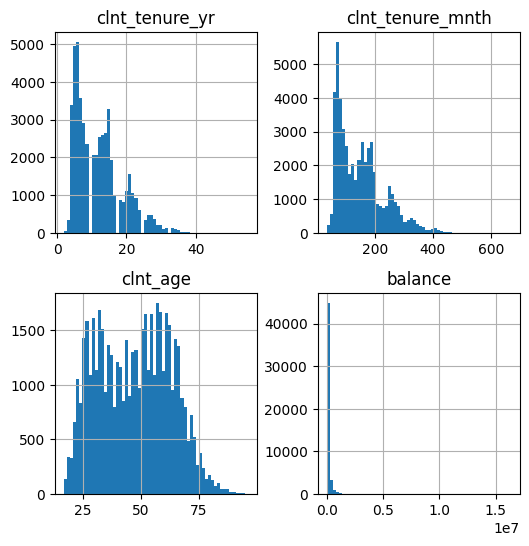

In [ ]:
# Creating histograms for each numerical column in 'df1 numerical'
df1[numerical_df1].hist(figsize=(6, 6), bins=60, xlabelsize=10, ylabelsize=10); # makes it automatically to fit the figure!

It confirms the first comments

## Looking at numerical df2

In [ ]:
# client_id	visitor_id	visit_id	process_step	date_time
categorical_df2= ['process_step'] # removed ['visitor_id', 'visit_id'] and client_id

****** Brief analysis of process_step *****


process_step
start      101153
step_1      68210
step_2      56672
step_3      48264
confirm     42936
Name: count, dtype: int64

process_step
start      0.318858
step_1     0.215014
step_2     0.178644
step_3     0.152140
confirm    0.135344
Name: proportion, dtype: float64

'mode = 0    start\nName: process_step, dtype: object'

/root/work/function_file.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x= column, palette="Set1")


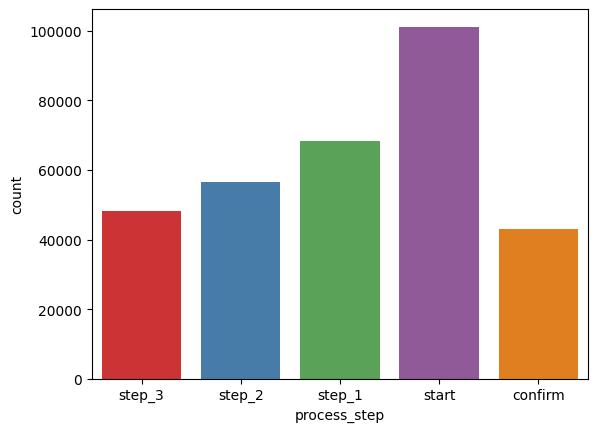

In [ ]:
for col in categorical_df2:
    cat_stats(df2, col) 

Comments:
- process_step: to analyse further taking variation into account and the ratios from one step to the other
- overall only 50% confirm what they have started!

# REMINDER: the data we imagine using has to match the 70K lines dataframe (so index <=> client_id)

# Creating the metrics (target dataframe)

## Interfaces, visits, process steps

Creating the counts per client_id: of 
- interfaces, 
- visits
- process steps

Creating a dataframe with client_id and number of interfaces/devices used by client to use in df1

In [ ]:
# count how many interfaces by client_id and visitor_id
temp1 = df2.groupby(['client_id'])['visitor_id'].nunique().sort_index()
temp1=pd.DataFrame(temp1).reset_index(drop=False).rename(columns = {'visitor_id':'devices'})

# count how many visits per client_id 
temp2 = df2.groupby(['client_id'])['visit_id'].nunique().sort_index()
temp2=pd.DataFrame(temp2).reset_index(drop=False).rename(columns = {'visit_id':'num_connection'})


In [ ]:
# count # of steps per client_id 

df3=df2.groupby(['client_id'])['process_step'].value_counts().unstack().reset_index(drop=False).fillna(0).sort_values('client_id')

# Merging of the dataframes and renaming the columns
df3 = pd.merge(df3,temp1, how = 'inner', on = 'client_id')
df3 = pd.merge(df3, temp2,on = 'client_id')
df3 = df3.rename(columns={'confirm':'num_confirm','start':'num_start', 'step_1':'num_step_1','step_2':'num_step_2','step_3':'num_step_3'})
df1= pd.merge(df1,df3, how = 'inner', on = 'client_id')
df1.shape

(50500, 17)

## Counting errors

Counting per visit: errors = total number of steps - (number of different steps (unique values...)), then add them per client...
visits with at least one error: if the value above is not 0... then at least one error..., then add them per client...

In [ ]:
# Creating series with multiIndex to count the 'minimum process' and the number of steps per visit per cient
gby_ref= df2.groupby(['client_id','visit_id'])['process_step'].nunique()
gby_len= df2.groupby(['client_id','visit_id'])['process_step'].count()

# gby_ref, gby_len

In [ ]:
# creating the num_errors (difference of the two groupby) per visit or connection
temp3 = gby_len-gby_ref
temp4=pd.DataFrame(temp3).reset_index(drop= False).rename(columns={'process_step':'num_error'})
temp4

,client_id,visit_id,num_error
0,555,637149525_38041617439_716659,0
1,647,40369564_40101682850_311847,0
2,934,7076463_57954418406_971348,3
3,1028,557292053_87239438319_391157,5
4,1104,543158812_46395476577_767725,0
...,...,...,...
69442,9999626,182723364_27031318473_880901,0
69443,9999729,493310979_9209676464_421146,1
69444,9999729,870243567_56915814033_814203,0
69445,9999729,99583652_41711450505_426179,0


In [ ]:
# Getting the average errors per client and the total number of errors per client
temp5= pd.DataFrame(temp4.groupby(['client_id'])['num_error'].mean()).reset_index(drop = False).rename(columns={'num_error':'avg_error'})
temp6= pd.DataFrame(temp4.groupby(['client_id'])['num_error'].sum()).reset_index(drop = False)
temp6
df4 = pd.merge(temp5,temp6, how = 'inner', on = 'client_id')
df1_final = pd.merge(df1, df4,on = 'client_id')
df1_final

,client_id,variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,balance,calls_6_mnth,logons_6_mnth,num_confirm,num_start,num_step_1,num_step_2,num_step_3,devices,num_connection,avg_error,num_error
0,9988021,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0,0.0,8.0,1.0,3.0,3.0,1,2,5.0,10
1,8320017,Test,22.0,274.0,34.5,M,2.0,36001.90,5.0,8.0,1.0,1.0,1.0,1.0,1.0,1,1,0.0,0
2,4033851,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0,3.0,2.0,2.0,4.0,4.0,1,1,10.0,10
3,1982004,Test,6.0,80.0,44.5,U,2.0,30231.76,1.0,4.0,1.0,1.0,1.0,1.0,1.0,1,1,0.0,0
4,9294070,Control,5.0,70.0,29.0,U,2.0,34254.54,0.0,3.0,0.0,2.0,0.0,0.0,0.0,1,1,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50495,393005,Control,15.0,191.0,52.5,M,2.0,60344.67,1.0,4.0,1.0,2.0,3.0,3.0,2.0,1,1,6.0,6
50496,2908510,Control,21.0,252.0,34.0,M,3.0,141808.05,6.0,9.0,0.0,2.0,1.0,1.0,0.0,1,1,1.0,1
50497,7230446,Test,6.0,74.0,62.0,M,2.0,58778.11,2.0,5.0,0.0,6.0,7.0,7.0,5.0,1,2,8.5,17
50498,5230357,Test,23.0,278.0,30.5,M,2.0,61349.70,0.0,3.0,1.0,1.0,1.0,1.0,1.0,1,2,0.0,0


## Date_time

Creating:
- years or months
- Time for each step (rule: if in the same session, time = time_line(n) - time_line(n-1) / assumption for last step (?) average of steps before?

In [ ]:
# creating a deep copy of df2 (df2 already filtered by gloria with only the client_id of df1)
df2c=df2.copy()
df2c.sort_values(by='date_time')
df2c=df2c.reset_index(drop=True)

# df2c['formatted_date']=df2c['date_time'].strftime("%I:%M %p")
# df2c

# Creating a column "date2" for dates in the datetime format
df2c['date2'] = pd.to_datetime(df2c['date_time'])
df2c= df2c.sort_values(by=['visit_id','date2'])

# Creating the next_date to calculate the step times (see assumptions)
df2c['next_date2']=df2c.sort_values(by='date2').groupby('visit_id')['date2'].shift(-1)

df2c['time_spent']=(df2c['next_date2']-df2c['date2']).dt.total_seconds()
df2c.head(20)

,client_id,visitor_id,visit_id,process_step,date_time,date2,next_date2,time_spent
106314,3561384,451664975_1722933822,100012776_37918976071_457913,confirm,2017-04-26 13:22:17,2017-04-26 13:22:17,2017-04-26 13:23:09,52.0
106313,3561384,451664975_1722933822,100012776_37918976071_457913,confirm,2017-04-26 13:23:09,2017-04-26 13:23:09,NaT,NaN
235345,7338123,612065484_94198474375,100019538_17884295066_43909,start,2017-04-09 16:20:56,2017-04-09 16:20:56,2017-04-09 16:21:12,16.0
235344,7338123,612065484_94198474375,100019538_17884295066_43909,step_1,2017-04-09 16:21:12,2017-04-09 16:21:12,2017-04-09 16:21:21,9.0
235343,7338123,612065484_94198474375,100019538_17884295066_43909,step_2,2017-04-09 16:21:21,2017-04-09 16:21:21,2017-04-09 16:21:35,14.0
235342,7338123,612065484_94198474375,100019538_17884295066_43909,step_1,2017-04-09 16:21:35,2017-04-09 16:21:35,2017-04-09 16:21:41,6.0
235341,7338123,612065484_94198474375,100019538_17884295066_43909,step_1,2017-04-09 16:21:41,2017-04-09 16:21:41,2017-04-09 16:21:45,4.0
235340,7338123,612065484_94198474375,100019538_17884295066_43909,start,2017-04-09 16:21:45,2017-04-09 16:21:45,2017-04-09 16:21:59,14.0
235339,7338123,612065484_94198474375,100019538_17884295066_43909,start,2017-04-09 16:21:59,2017-04-09 16:21:59,2017-04-09 16:22:04,5.0
235338,7338123,612065484_94198474375,100019538_17884295066_43909,step_1,2017-04-09 16:22:04,2017-04-09 16:22:04,2017-04-09 16:22:08,4.0


In [ ]:
# Assigning 900 s max to the times >= 900s
df2c['time_spent'] = df2c['time_spent'].apply(lambda x : x if x < 900 else 900)

# Extracting the average times per step per client, creating a function

def time_step(df, step): #Had to keep it as when importing it does not recognise pd...
    """ Creates a DataFrame with the average times of each step from the DataFrame df2c copy of df2"""
    name = 'avg_time_'+ step
    data = df[df['process_step'] == step].sort_values('date2')
    temp = pd.DataFrame(data.groupby(['client_id','process_step'])['time_spent'].mean()).reset_index(drop = False).rename(columns={'time_spent': name})
     
    return temp[['client_id', name]]

df2c

,client_id,visitor_id,visit_id,process_step,date_time,date2,next_date2,time_spent
106314,3561384,451664975_1722933822,100012776_37918976071_457913,confirm,2017-04-26 13:22:17,2017-04-26 13:22:17,2017-04-26 13:23:09,52.0
106313,3561384,451664975_1722933822,100012776_37918976071_457913,confirm,2017-04-26 13:23:09,2017-04-26 13:23:09,NaT,900.0
235345,7338123,612065484_94198474375,100019538_17884295066_43909,start,2017-04-09 16:20:56,2017-04-09 16:20:56,2017-04-09 16:21:12,16.0
235344,7338123,612065484_94198474375,100019538_17884295066_43909,step_1,2017-04-09 16:21:12,2017-04-09 16:21:12,2017-04-09 16:21:21,9.0
235343,7338123,612065484_94198474375,100019538_17884295066_43909,step_2,2017-04-09 16:21:21,2017-04-09 16:21:21,2017-04-09 16:21:35,14.0
...,...,...,...,...,...,...,...,...
95173,6627522,730634087_44272418812,999988789_76411676596_272843,start,2017-04-21 23:49:11,2017-04-21 23:49:11,2017-04-21 23:49:22,11.0
95172,6627522,730634087_44272418812,999988789_76411676596_272843,step_1,2017-04-21 23:49:22,2017-04-21 23:49:22,2017-04-21 23:50:16,54.0
95171,6627522,730634087_44272418812,999988789_76411676596_272843,step_2,2017-04-21 23:50:16,2017-04-21 23:50:16,2017-04-21 23:51:00,44.0
95170,6627522,730634087_44272418812,999988789_76411676596_272843,step_1,2017-04-21 23:51:00,2017-04-21 23:51:00,2017-04-21 23:51:09,9.0


In [ ]:
# Looping to create the data for each step and merge it onto df1
df1_final
steps = ['confirm', 'start', 'step_1', 'step_2', 'step_3']

for step in steps:
    df1_final= pd.merge(df1_final, time_step(df2c, step), how = 'left', on = 'client_id')


In [ ]:
# And finally adding the average time for the process (sum of the columns except for the 'avg_time_commit' one...)
df1_final['avg_time_client']= df1_final['avg_time_start'].fillna(0) + df1_final['avg_time_step_1'].fillna(0)+ df1_final['avg_time_step_2'].fillna(0)+df1_final['avg_time_step_3'].fillna(0)
df1_final.describe()

# NOTE the 'avg_time_commit' probably is a good indicator of the ones we have to remove... as normally we should only
# keep the ones with no values! (as it is a last )

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,num_accts,balance,calls_6_mnth,logons_6_mnth,num_confirm,num_start,...,devices,num_connection,avg_error,num_error,avg_time_confirm,avg_time_start,avg_time_step_1,avg_time_step_2,avg_time_step_3,avg_time_client
count,5.050000e+04,50488.000000,50488.000000,50487.000000,50488.000000,5.048800e+04,50488.000000,50488.000000,50500.000000,50500.00000,...,50500.000000,50500.000000,50500.000000,50500.000000,34121.000000,50076.000000,44419.000000,40908.000000,38303.000000,50500.000000
mean,5.006179e+06,12.031730,150.415485,47.319795,2.254575,1.495147e+05,3.093289,6.131873,0.850218,2.00303,...,1.116297,1.375188,1.114044,1.542653,843.081942,186.403862,117.691437,129.717626,176.121627,527.021208
std,2.877443e+06,6.860282,81.944830,15.518616,0.533671,3.020364e+05,2.187991,2.175423,0.919318,2.00472,...,0.415305,0.822854,1.876089,2.718315,170.182359,266.834850,214.867312,177.120720,234.538551,362.668521
min,5.550000e+02,2.000000,33.000000,17.000000,1.000000,2.378944e+04,0.000000,3.000000,0.000000,0.00000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,5.000000,0.000000
25%,2.515646e+06,6.000000,82.000000,33.500000,2.000000,3.987841e+04,1.000000,4.000000,0.000000,1.00000,...,1.000000,1.000000,0.000000,0.000000,900.000000,11.000000,15.000000,45.000000,39.000000,207.000000
50%,5.025104e+06,11.000000,136.000000,48.000000,2.000000,6.573360e+04,3.000000,6.000000,1.000000,1.00000,...,1.000000,1.000000,0.000000,0.000000,900.000000,35.000000,32.000000,73.000000,75.000000,460.500000
75%,7.477933e+06,16.000000,192.000000,59.500000,2.000000,1.399565e+05,5.000000,8.000000,1.000000,2.00000,...,1.000000,2.000000,2.000000,2.000000,900.000000,309.333333,79.000000,125.000000,184.000000,873.000000
max,9.999832e+06,55.000000,669.000000,96.000000,7.000000,1.632004e+07,6.000000,9.000000,19.000000,54.00000,...,14.000000,18.000000,56.000000,56.000000,900.000000,900.000000,900.000000,900.000000,900.000000,2648.000000


In [ ]:
# define AM/PM categories to be applied and displayed in a new column ('time_cat') / months, days, hours if needed
df2c['month'] = df2c['date2'].dt.month
df2c['day'] = df2c['date2'].dt.day
df2c['hour'] = df2c['date2'].dt.hour

def am_pm(time):
    if 6 <= time < 12:
        return 'AM'
    elif 12 <= time < 23:
        return 'PM'
    else:
        return 'Night'
df2c['time_cat'] = df2c['hour'].apply(lambda x: am_pm(x))

Reformating df1_final to have it cleaner

In [ ]:
list_clean = ['avg_time_confirm', 'avg_time_start', 'avg_time_step_1', 'avg_time_step_2','avg_time_step_3', 'avg_time_client']
for col in list_clean:
    df1_final[col]= df1_final[col].apply(clean)

In [ ]:
# Adding the last column 'process_completed' (True or False)
df1_final['process_completed'] = df1_final['num_confirm'].apply(lambda x: True if x>0 else False)
df1_final.columns

Index(['client_id', 'variation', 'clnt_tenure_yr', 'clnt_tenure_mnth',
       'clnt_age', 'gendr', 'num_accts', 'balance', 'calls_6_mnth',
       'logons_6_mnth', 'num_confirm', 'num_start', 'num_step_1', 'num_step_2',
       'num_step_3', 'devices', 'num_connection', 'avg_error', 'num_error',
       'avg_time_confirm', 'avg_time_start', 'avg_time_step_1',
       'avg_time_step_2', 'avg_time_step_3', 'avg_time_client',
       'process_completed'],
      dtype='object')

In [ ]:
# quick check to see if there are empty values... apparently not, so all the clients in our dataframe finished
# the process
df1_final['process_completed'].value_counts()

df1_final['num_confirm'].isna().value_counts()

num_confirm
False    50500
Name: count, dtype: int64

# Beginning of analysis (or Analysis)

## General information about the clients

In [ ]:
# Checking for the whole population
df1_final.columns

Index(['client_id', 'variation', 'clnt_tenure_yr', 'clnt_tenure_mnth',
       'clnt_age', 'gendr', 'num_accts', 'balance', 'calls_6_mnth',
       'logons_6_mnth', 'num_confirm', 'num_start', 'num_step_1', 'num_step_2',
       'num_step_3', 'devices', 'num_connection', 'avg_error', 'num_error',
       'avg_time_confirm', 'avg_time_start', 'avg_time_step_1',
       'avg_time_step_2', 'avg_time_step_3', 'avg_time_client',
       'process_completed'],
      dtype='object')

Creating filters and categories to be used

In [ ]:
# Filters on Variation
m_var_test = df1_final['variation'] == 'Test'
m_var_ref = df1['variation'] == 'Control'

# Filters on clnt_age, not necessary as I have discretized below

# Filters on gendr
m_gendr_fem = df1_final['gendr'] == 'F'
m_gendr_mal = df1_final['gendr'] == 'M'

# Filters on balance idea => to define 3 or 4 threshholds using interquartiles


In [ ]:
# Discretizing 'age' into 6 categories
bins = [0, 20, 30, 40, 50, 60, df1_final['clnt_age'].max()] # we define the sizes of the bins
labels = ['less_20', '20s', '30s', '40s', '50s','more_60']
df1_final['age_category'] = pd.cut(df1_final['clnt_age'], bins=bins, labels=labels, include_lowest=True)

# or via quartiles (for the balances)
# Discretizing 'balance' into quintiles
df1_final['balance_category'] = pd.qcut(df1_final['balance'], q=5, labels=['A--','A-', 'A', 'A+', 'A++'])

# Discretizing 'clnt_tenure_month' into 6 categories
bins = [0, 60, 120, 180, 240, 300, df1_final['clnt_tenure_mnth'].max()] # we define the sizes of the bins
labels = ['less_5y', '5_10y', '10_15y', '15_20y', '20_25y','more_25y']
df1_final['tenure_category'] = pd.cut(df1_final['clnt_tenure_mnth'], bins=bins, labels=labels, include_lowest=True)

df1_final.head(20)

,client_id,variation,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,balance,calls_6_mnth,logons_6_mnth,...,avg_time_confirm,avg_time_start,avg_time_step_1,avg_time_step_2,avg_time_step_3,avg_time_client,process_completed,age_category,balance_category,tenure_category
0,9988021,Test,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0,...,NaN,792.4,14.0,24.7,472.7,1303.7,False,more_60,A++,5_10y
1,8320017,Test,22.0,274.0,34.5,M,2.0,36001.90,5.0,8.0,...,900.0,18.0,16.0,63.0,22.0,119.0,True,30s,A--,20_25y
2,4033851,Control,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0,...,303.7,32.0,66.0,56.2,267.8,422.0,True,more_60,A+,10_15y
3,1982004,Test,6.0,80.0,44.5,U,2.0,30231.76,1.0,4.0,...,900.0,4.0,15.0,68.0,93.0,180.0,True,40s,A--,5_10y
4,9294070,Control,5.0,70.0,29.0,U,2.0,34254.54,0.0,3.0,...,NaN,457.5,NaN,NaN,NaN,457.5,False,20s,A--,5_10y
5,9466803,Test,11.0,137.0,27.0,F,2.0,46131.19,1.0,4.0,...,NaN,303.0,68.0,29.0,NaN,400.0,False,20s,A-,10_15y
6,3170143,Test,21.0,254.0,53.5,F,2.0,192109.59,6.0,9.0,...,900.0,318.0,454.0,161.0,41.0,974.0,True,50s,A++,20_25y
7,6651403,Control,13.0,162.0,56.5,M,2.0,324712.88,4.0,7.0,...,900.0,23.8,311.3,70.3,209.5,615.0,True,50s,A++,10_15y
8,5887227,Test,6.0,79.0,32.5,U,2.0,60274.39,1.0,4.0,...,900.0,260.5,87.0,98.0,113.0,558.5,True,30s,A,5_10y
9,2105948,Control,6.0,74.0,61.5,U,2.0,39795.28,1.0,4.0,...,900.0,392.0,461.5,36.0,185.0,1074.5,True,more_60,A-,5_10y


In [ ]:
# Making lists for analysis
list_categorical = ['variation','gendr', 'process_completed']
list_var_numerical = ['clnt_tenure_yr', 'clnt_tenure_mnth','clnt_age','num_accts', 'balance', 'calls_6_mnth','logons_6_mnth']
list_kpi_numerical = ['num_confirm', 'num_start', 'num_step_1', 'num_step_2','num_step_3', 'devices', 'num_connection', 'avg_error', 'num_error','avg_time_confirm', 'avg_time_start', 'avg_time_step_1','avg_time_step_2', 'avg_time_step_3', 'avg_time_client']

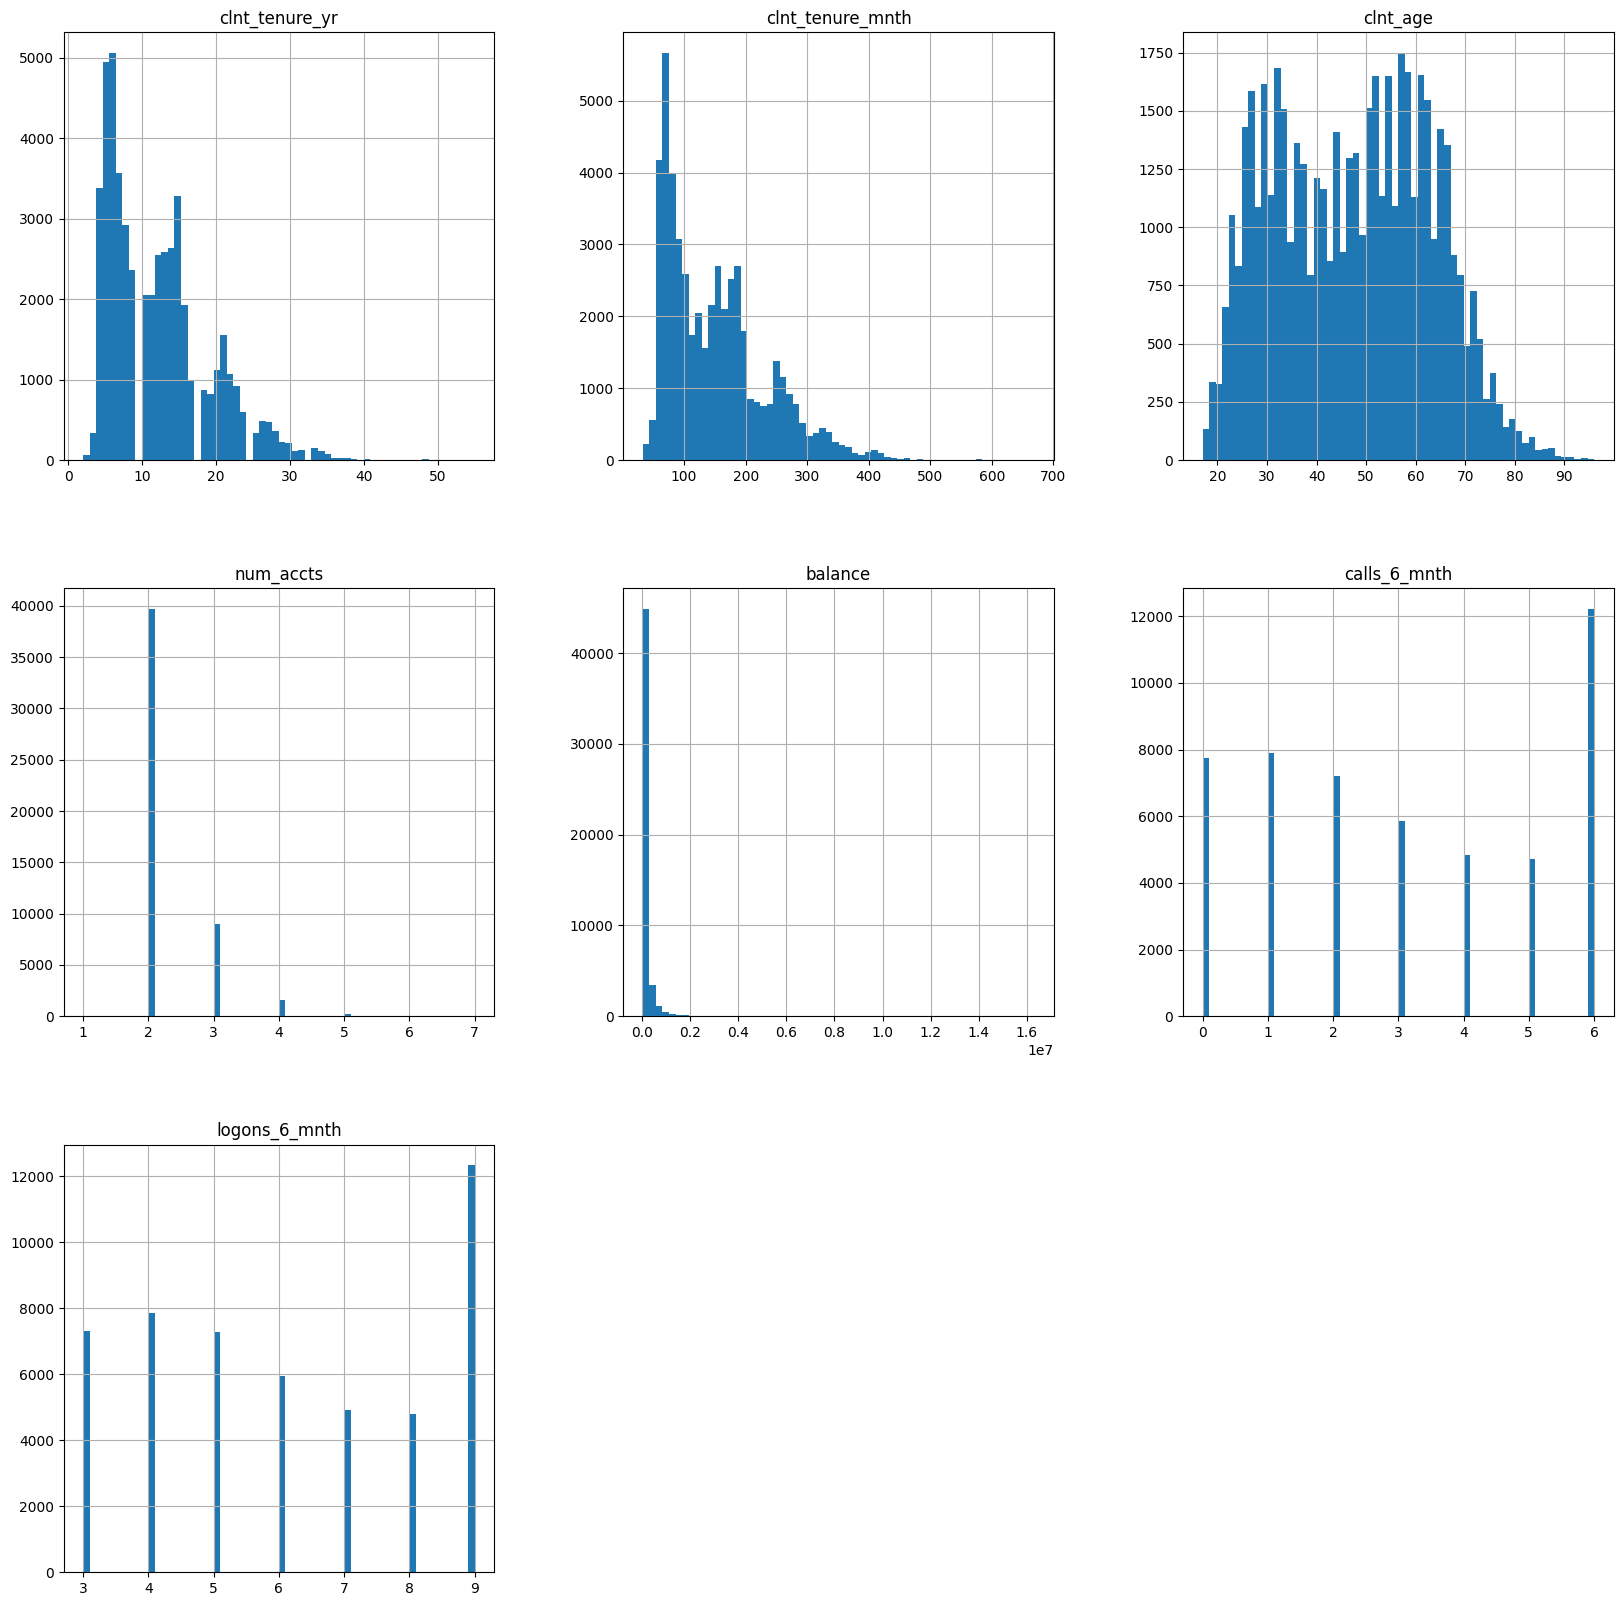

In [ ]:
df1_final[list_var_numerical].hist(figsize=(20, 20), bins=60, xlabelsize=10, ylabelsize=10); # makes it automatically to fit the figure!

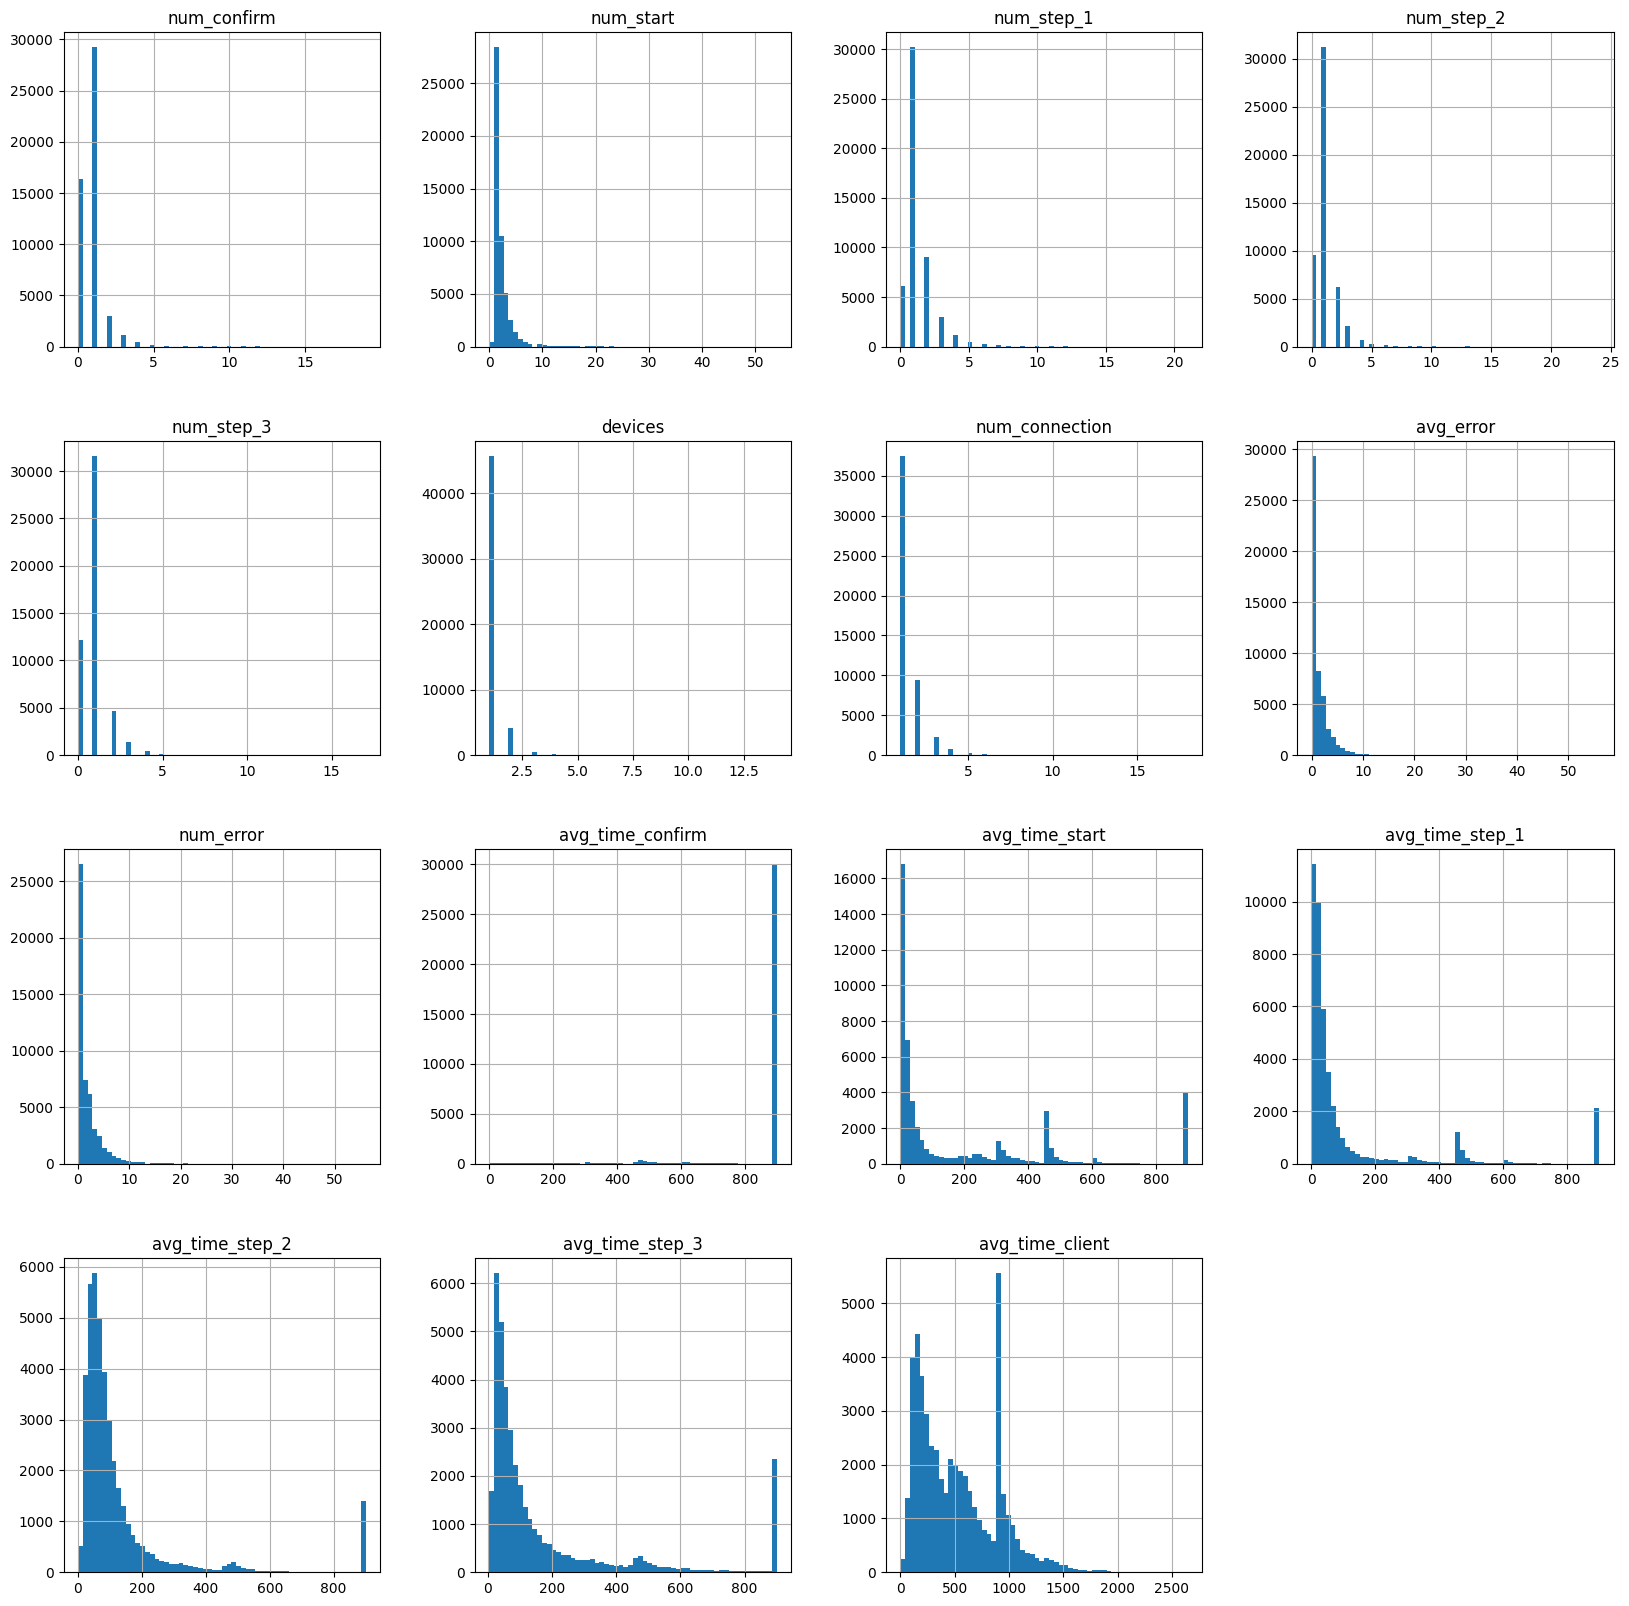

In [ ]:
df1_final[list_kpi_numerical].hist(figsize=(20, 20), bins=60, xlabelsize=10, ylabelsize=10); # makes it automatically to fit the figure!

## Reference population

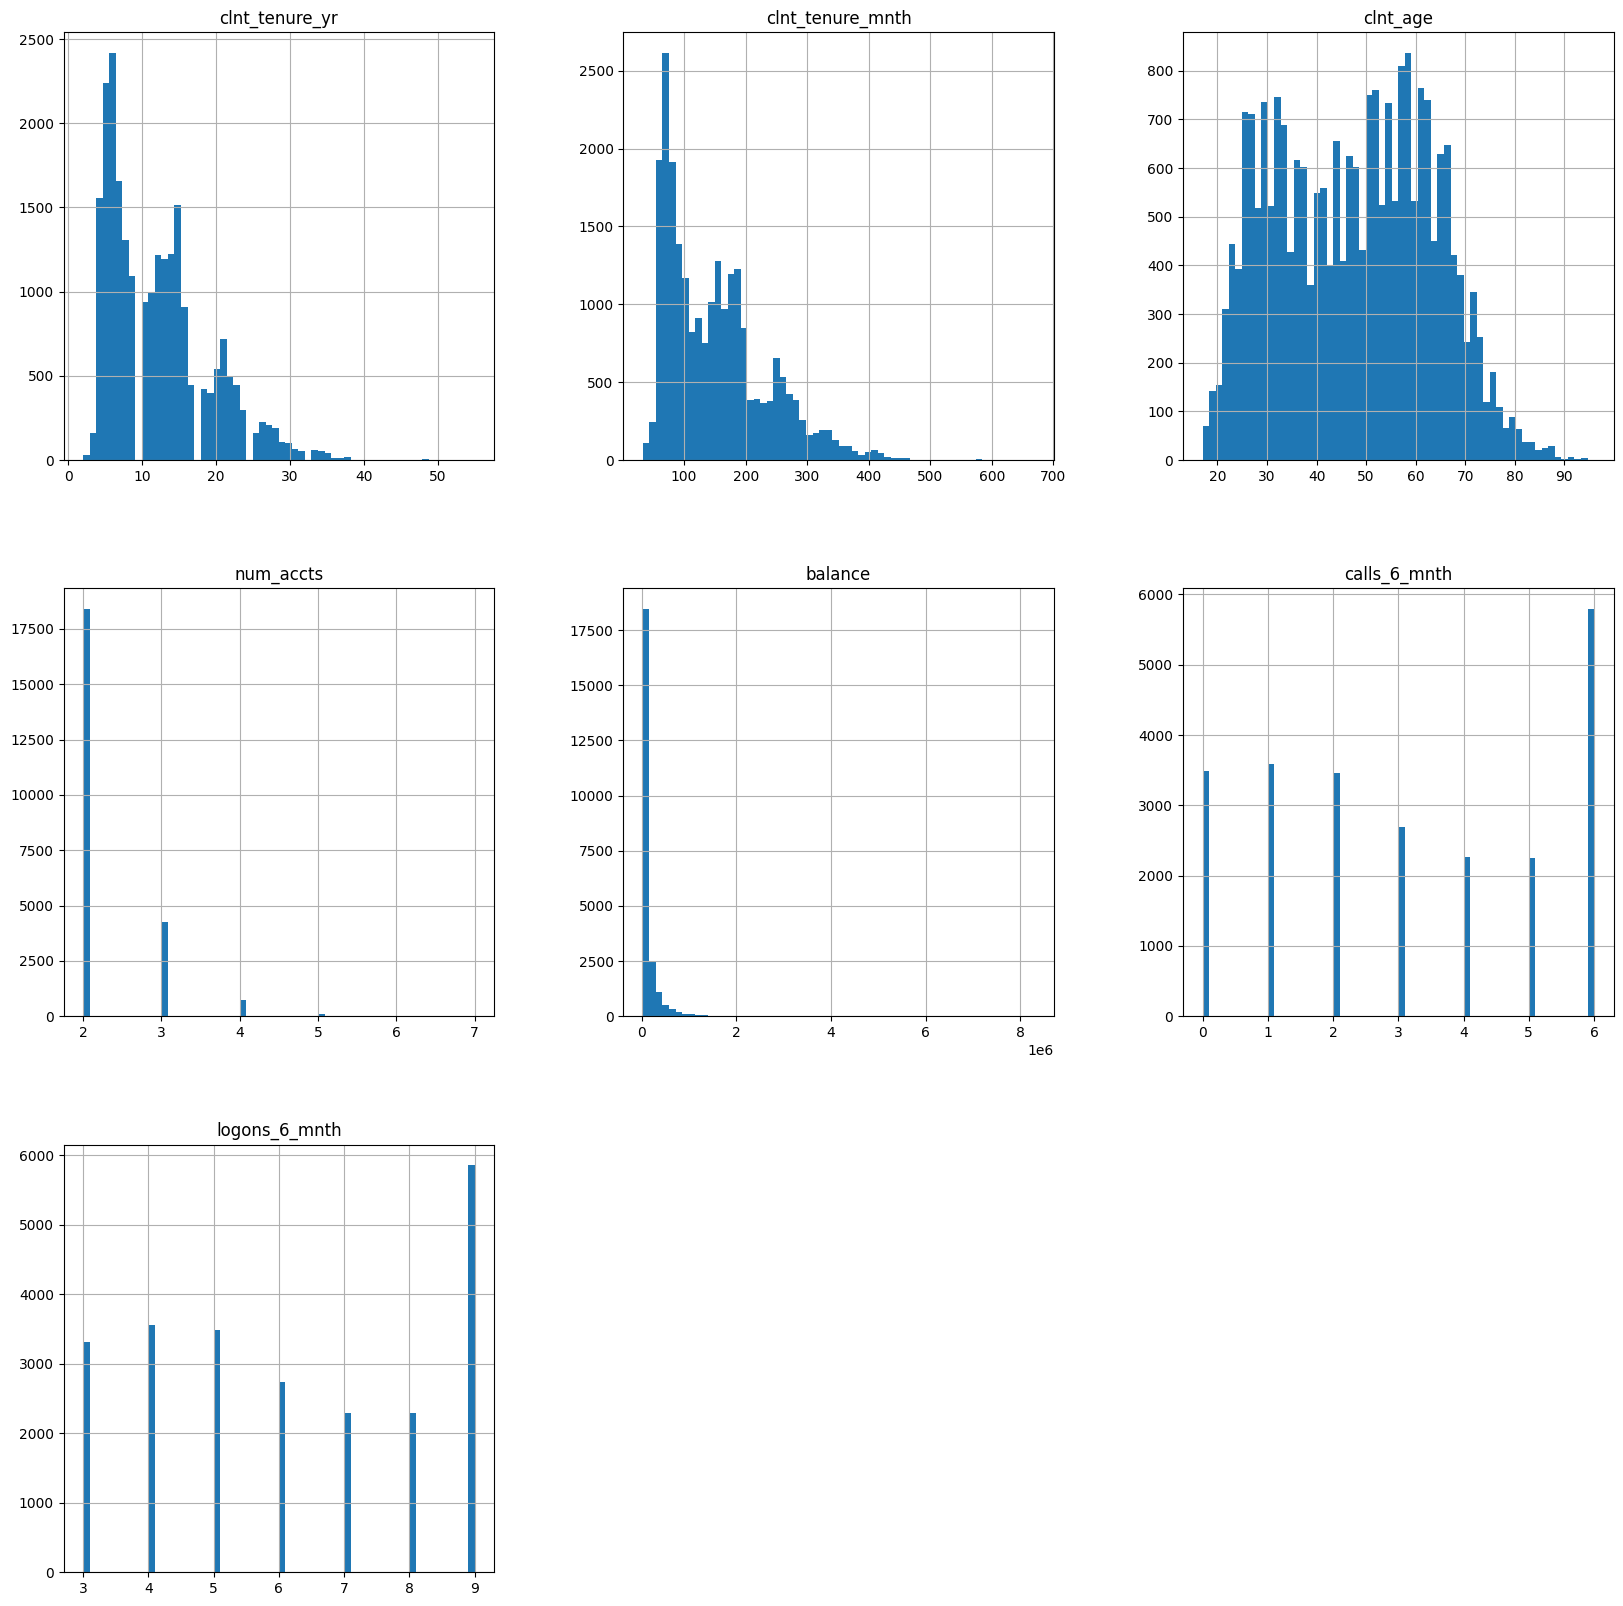

In [ ]:
df1_final[m_var_ref][list_var_numerical].hist(figsize=(20, 20), bins=60, xlabelsize=10, ylabelsize=10); # makes it automatically to fit the figure!

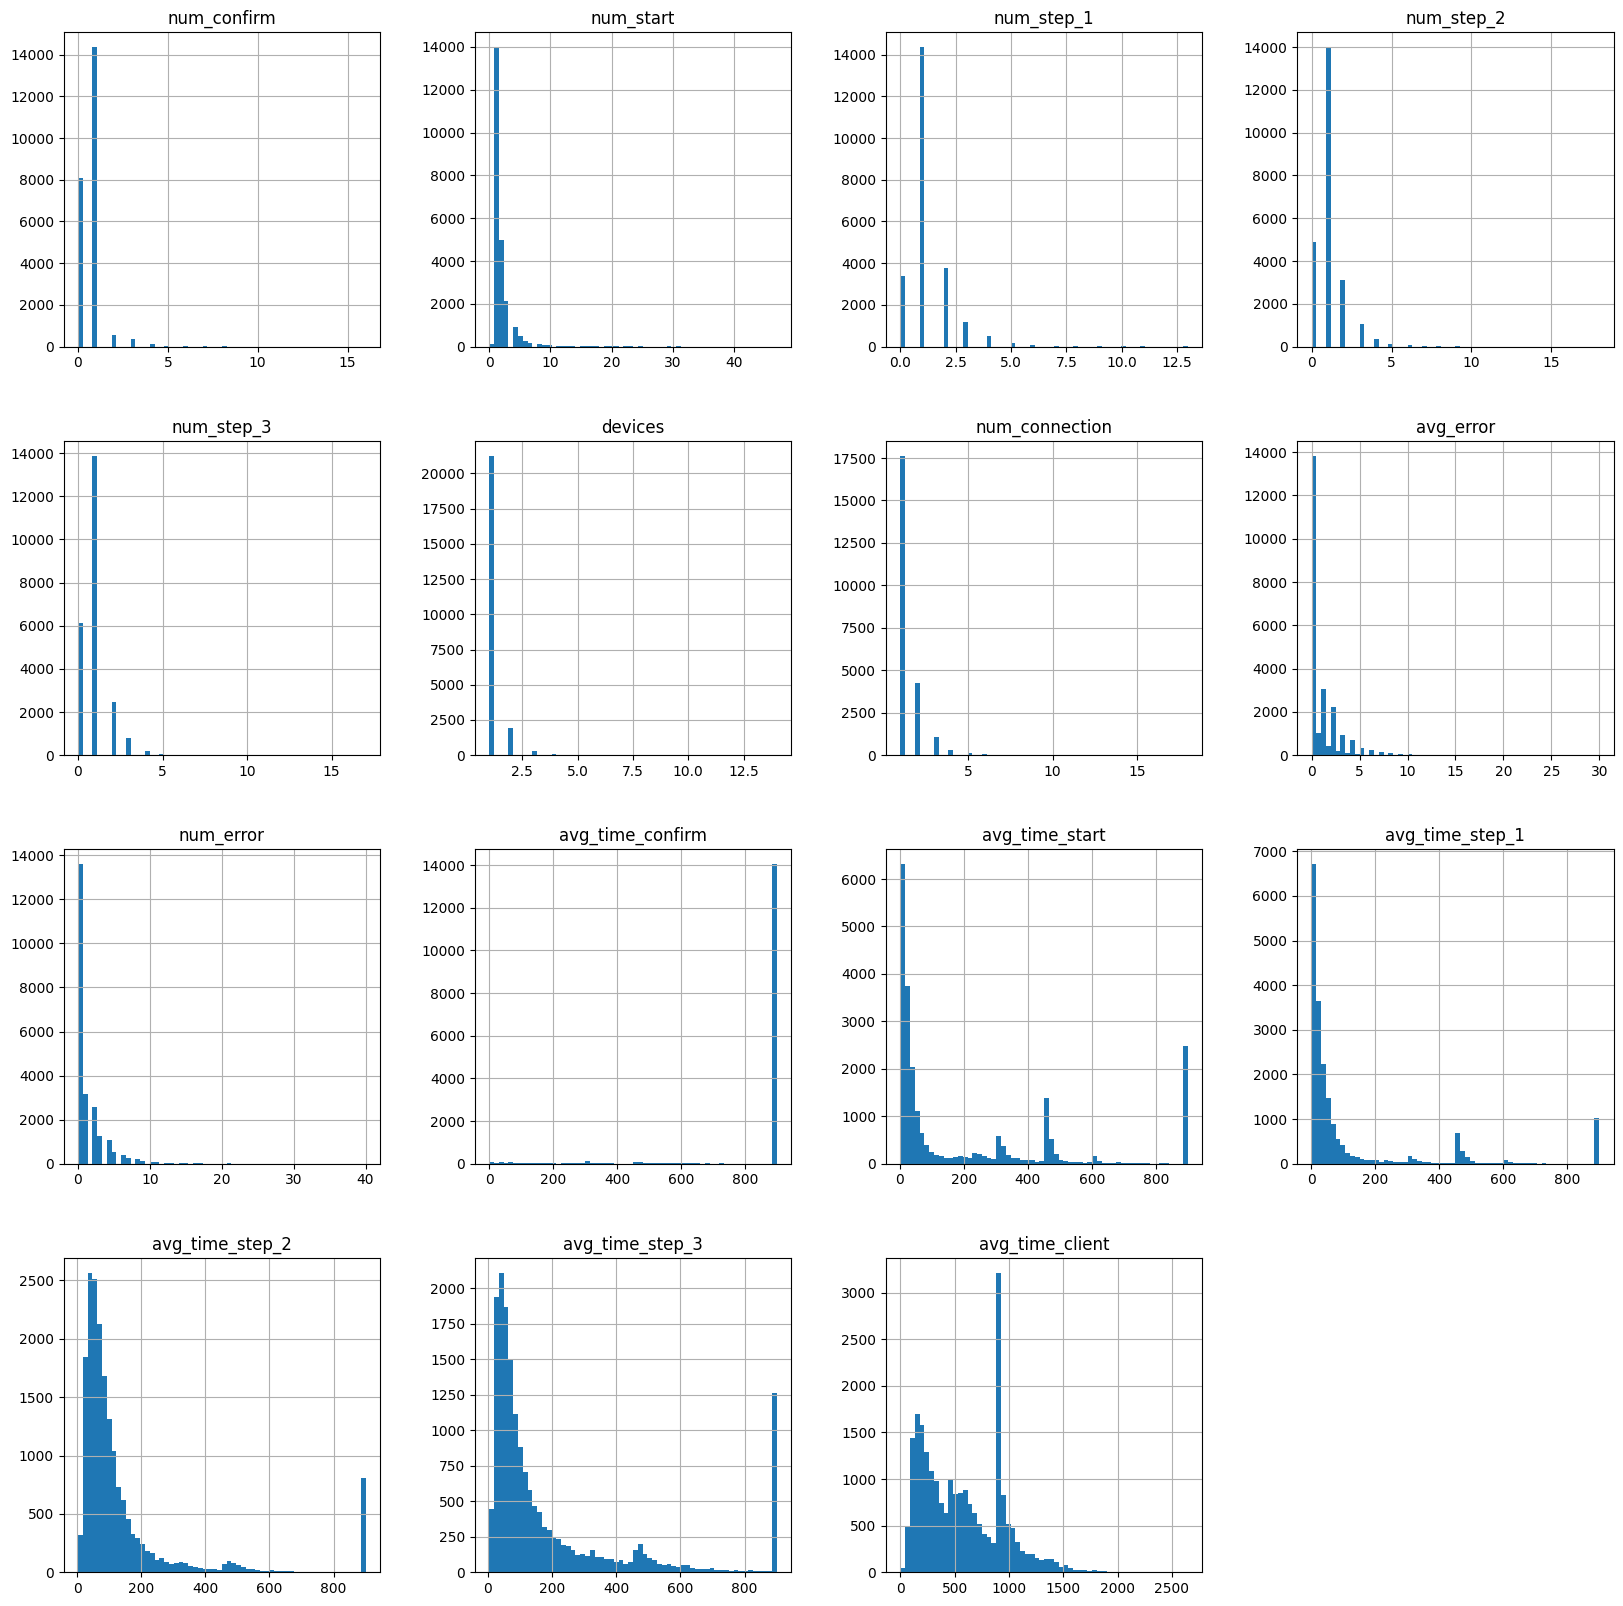

In [ ]:
df1_final[m_var_ref][list_kpi_numerical].hist(figsize=(20, 20), bins=60, xlabelsize=10, ylabelsize=10); # makes it automatically to fit the figure!

****** Brief Analysis of avg_error *****
mean= 1.0, median= 0.0, mode= 0.0
var = 2.88, std_dev = 1.7, min = 0.0, max = 30.0, range = 30.0
quantiles : 
0.25    0.0
0.50    0.0
0.75    1.0
Name: avg_error, dtype: float64


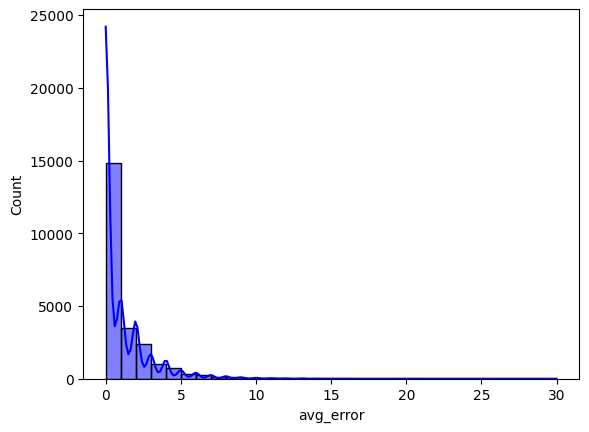

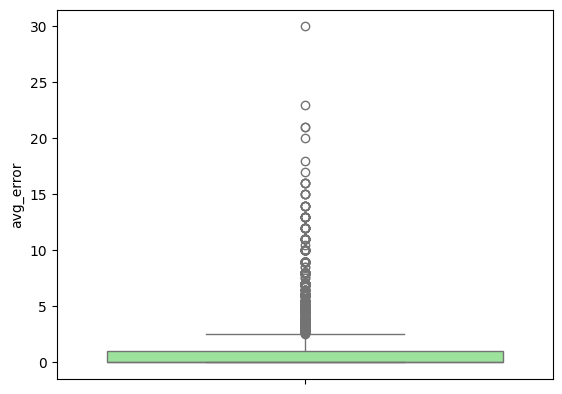

In [ ]:
# Looking at the total_time to compare it with the other population
num_stats(df1_final[m_var_ref], 'avg_error')

****** Brief Analysis of avg_time_client *****
mean= 576.0, median= 526.0, mode= 900.0
var = 134737.62, std_dev = 367.07, min = 0.0, max = 2648.0, range = 2648.0
quantiles : 
0.25    240.275
0.50    526.000
0.75    900.000
Name: avg_time_client, dtype: float64


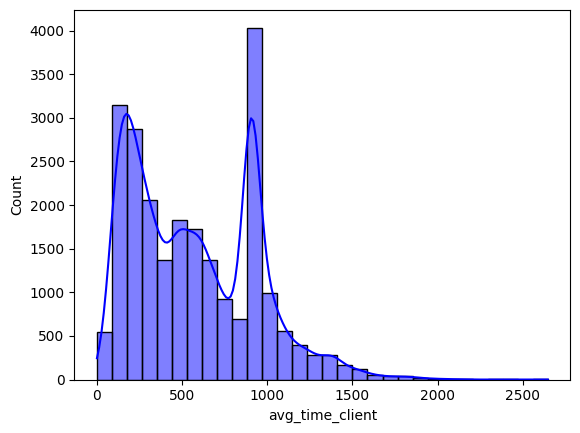

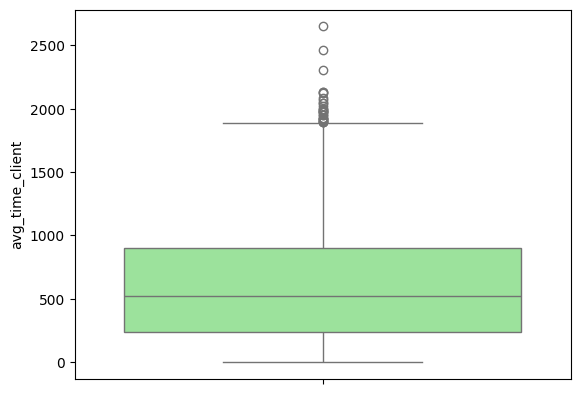

In [ ]:
# Looking at the error rate to compare it with the other population
num_stats(df1_final[m_var_ref], 'avg_time_client')

### KPI1 and other variables

## Test population

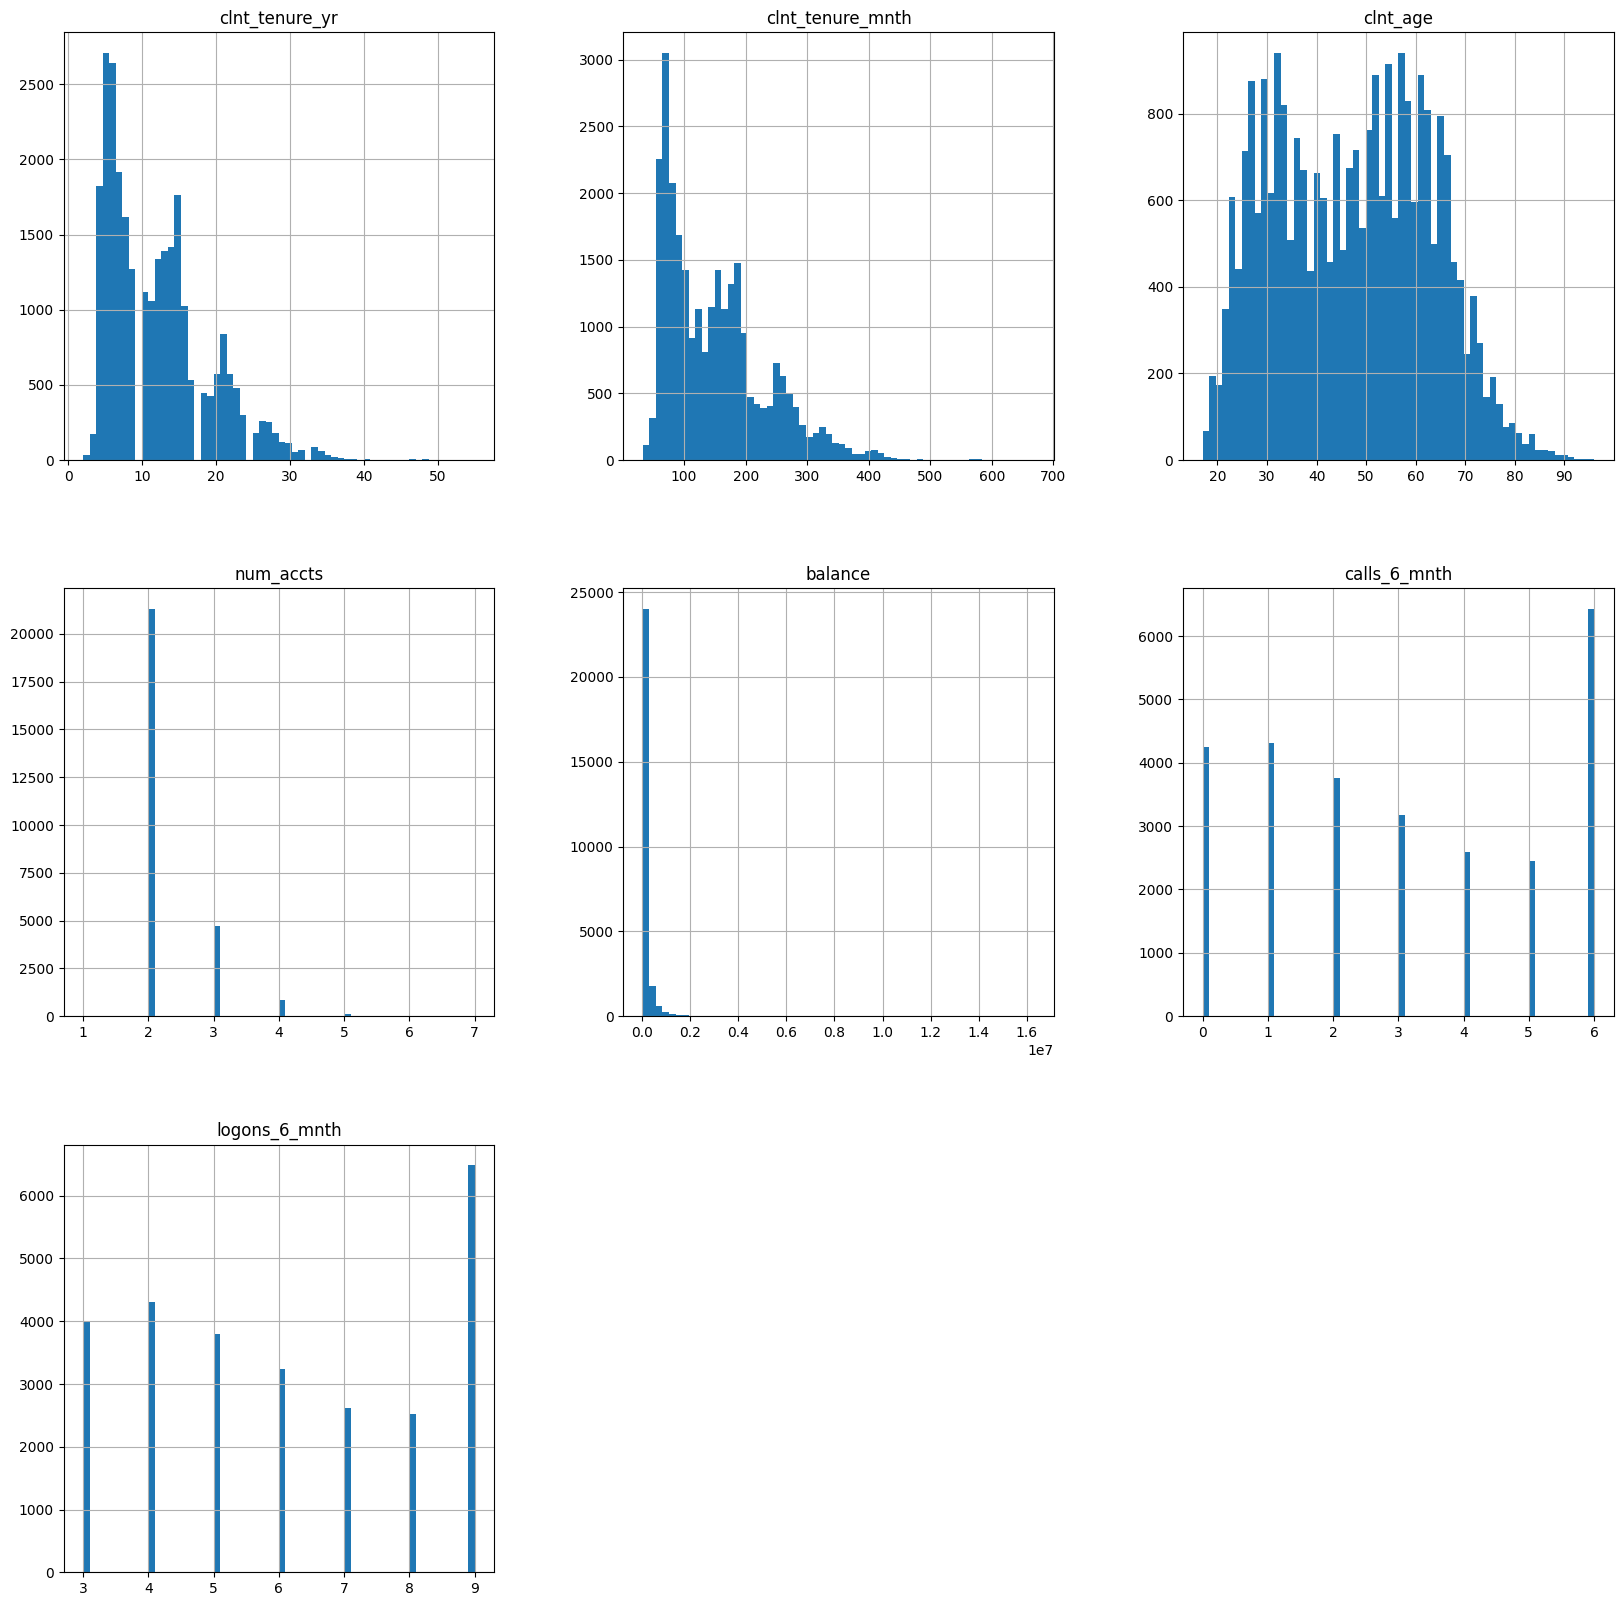

In [ ]:
df1_final[m_var_test][list_var_numerical].hist(figsize=(20, 20), bins=60, xlabelsize=10, ylabelsize=10); # makes it automatically to fit the figure!

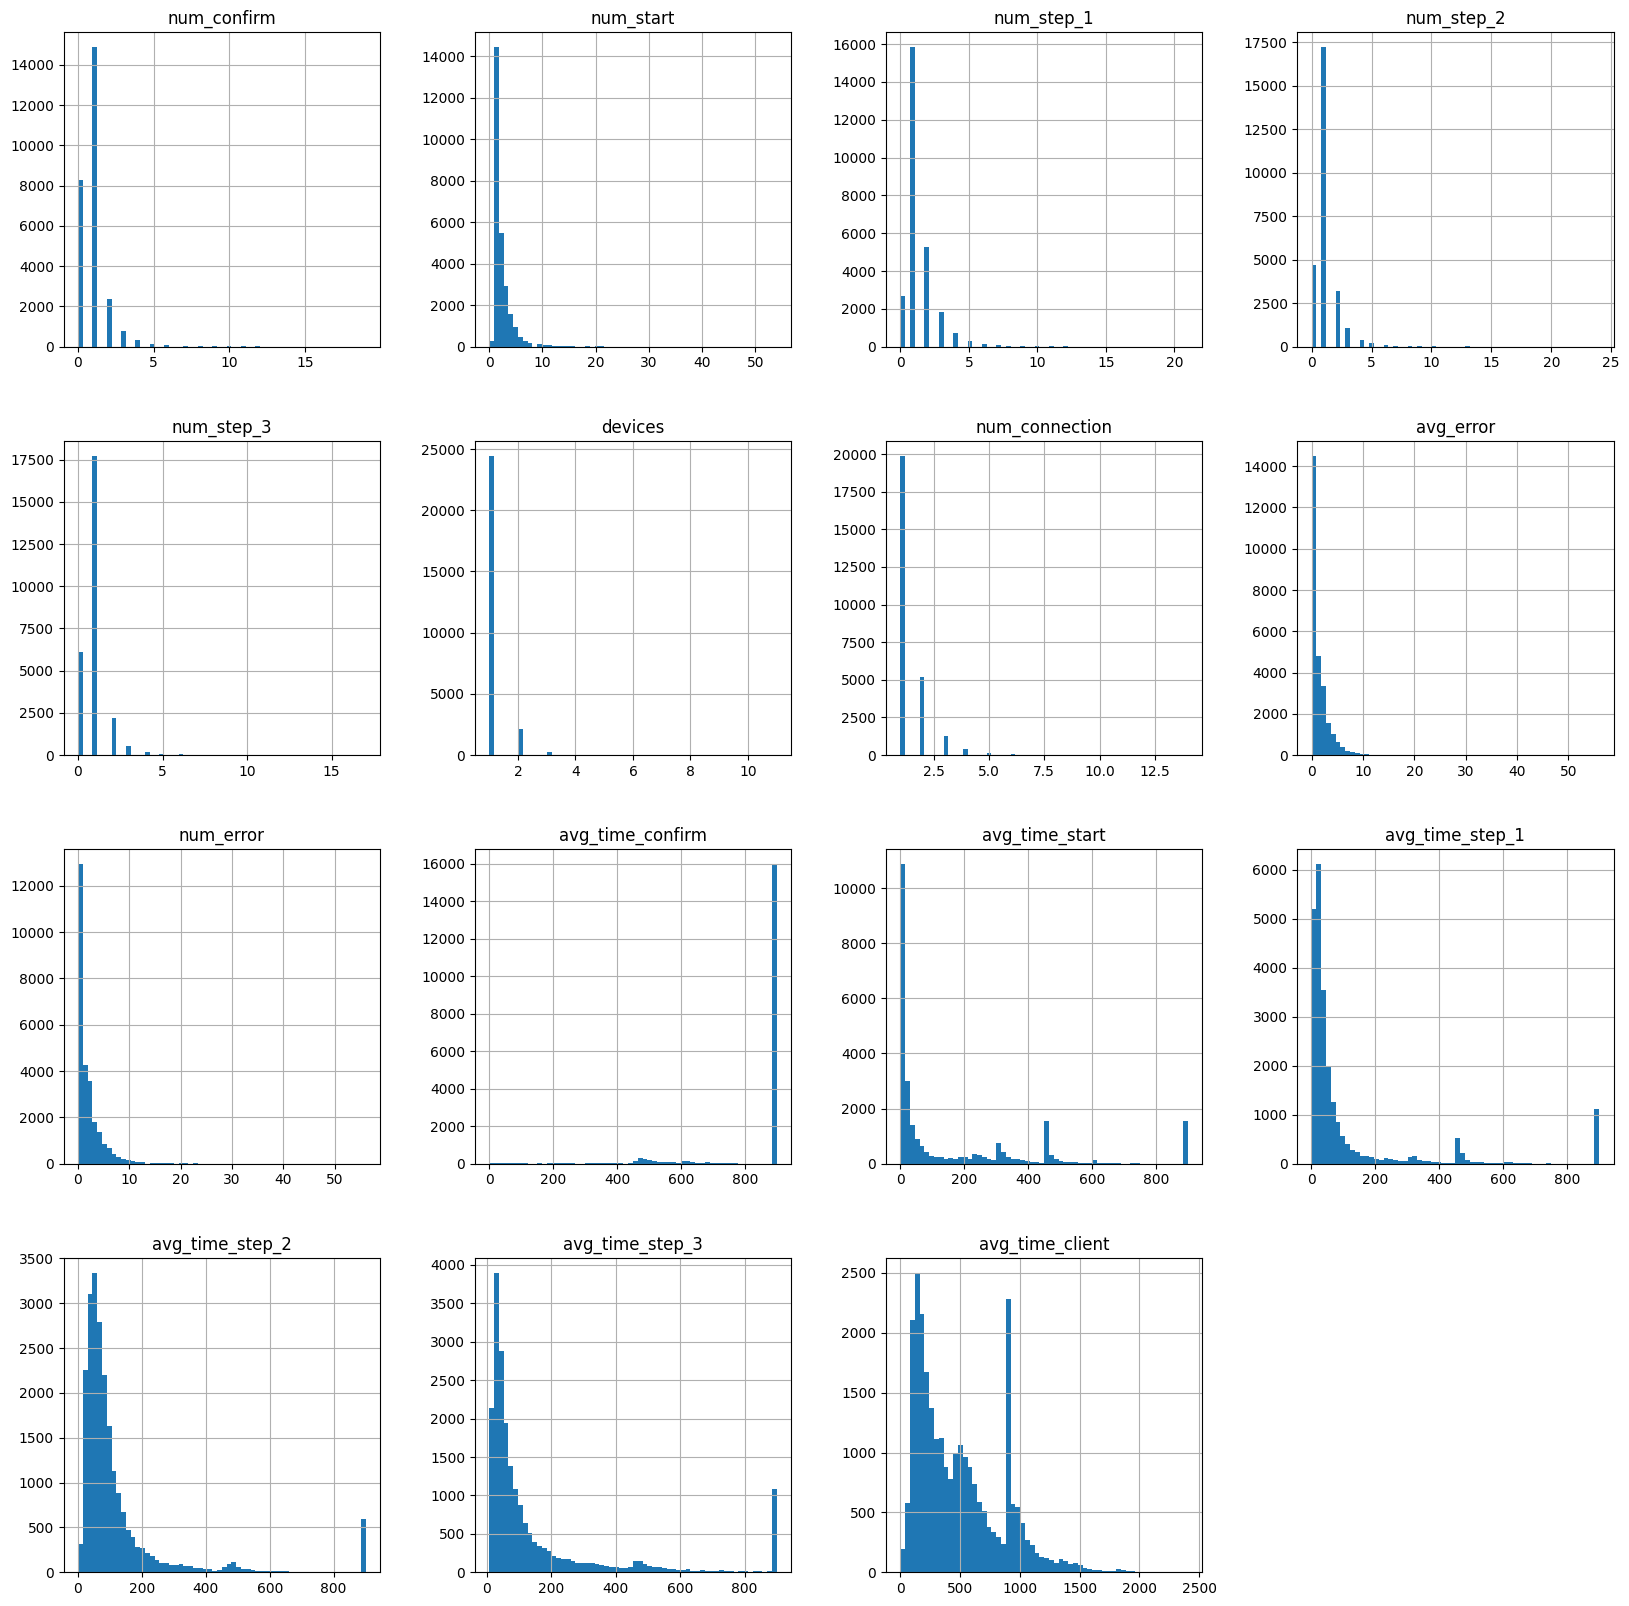

In [ ]:
df1_final[m_var_test][list_kpi_numerical].hist(figsize=(20, 20), bins=60, xlabelsize=10, ylabelsize=10); # makes it automatically to fit the figure!

****** Brief Analysis of avg_error *****
mean= 1.0, median= 0.5, mode= 0.0
var = 4.03, std_dev = 2.01, min = 0.0, max = 56.0, range = 56.0
quantiles : 
0.25    0.0
0.50    0.5
0.75    2.0
Name: avg_error, dtype: float64


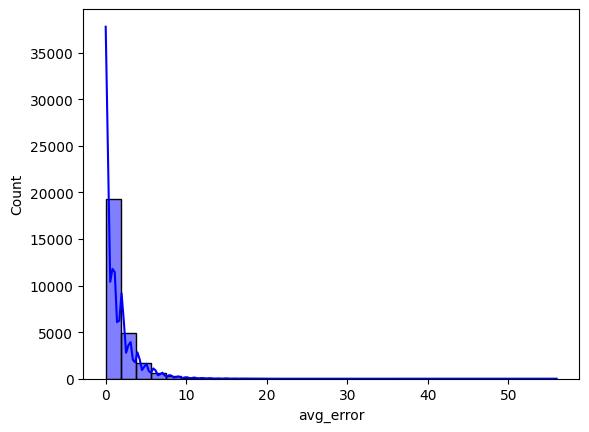

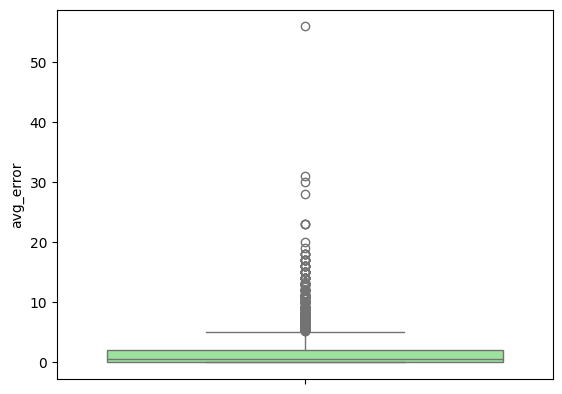

In [ ]:
# Looking at the total_time to compare it with the other population
num_stats(df1_final[m_var_test], 'avg_error')

****** Brief Analysis of avg_time_client *****
mean= 485.0, median= 391.35, mode= 900.0
var = 124888.73, std_dev = 353.4, min = 0.0, max = 2407.0, range = 2407.0
quantiles : 
0.25    184.150
0.50    391.350
0.75    723.925
Name: avg_time_client, dtype: float64


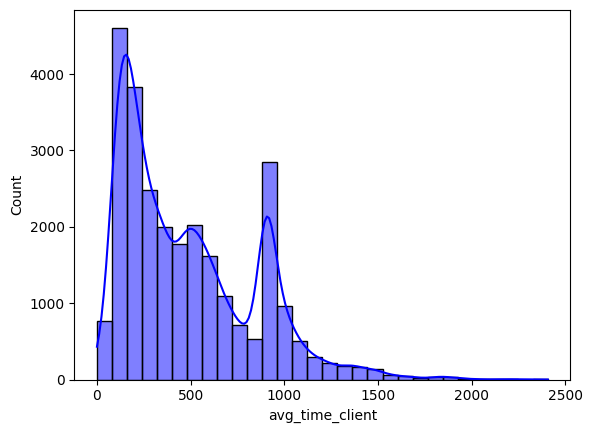

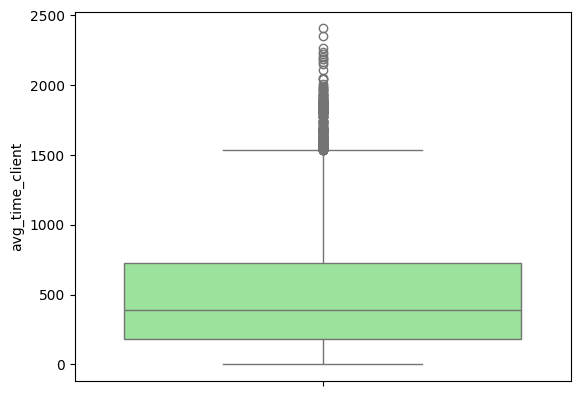

In [ ]:
# Looking at the error rate to compare it with the other population
num_stats(df1_final[m_var_test], 'avg_time_client')

## Comparing the two populations

CSV for Tableau  and archives

In [ ]:
df1_copy = df1_final.copy()
df1_copy.columns

Index(['client_id', 'variation', 'clnt_tenure_yr', 'clnt_tenure_mnth',
       'clnt_age', 'gendr', 'num_accts', 'balance', 'calls_6_mnth',
       'logons_6_mnth', 'num_confirm', 'num_start', 'num_step_1', 'num_step_2',
       'num_step_3', 'devices', 'num_connection', 'avg_error', 'num_error',
       'avg_time_confirm', 'avg_time_start', 'avg_time_step_1',
       'avg_time_step_2', 'avg_time_step_3', 'avg_time_client',
       'process_completed', 'age_category', 'balance_category',
       'tenure_category'],
      dtype='object')

In [ ]:
df1_copy.to_csv('vanguard_data.csv')

### Hypothesis on completion rate

In [ ]:
import scipy.stats as st
import numpy as np

#creating the data groups to be compared
df_test = df1_final[ df1_final["variation"] == "Test" ]["process_completed"] 
df_control = df1_final[ df1_final["variation"]=="Control"]["process_completed"]

#Set the hypothesis
print('H0: process_completed Test <= process_completed Control')
print('H1: process_completed Test > process_completed Control')
#significance level = 0.05
alpha = 0.05

_ , p_value = st.ttest_ind(df_test, df_control, equal_var=False, alternative = "greater") 

print(f' p_value = {p_value}')
if p_value > alpha:
    print("We are not able to reject the null hypothesis")
else:
    print("We reject the null hypotesis")
      

H0: process_completed Test <= process_completed Control
H1: process_completed Test > process_completed Control
 p_value = 4.0048843353918305e-19
We reject the null hypotesis


We reject the null hypothesis (process_completed Test <= process_completed Control): we can confidentily assume that the ratio of completed processes is higher for the Test population than for the Control population.

Checking if it is at least a 5% improvement (Test vs Control)

In [ ]:
#creating the data groups to be compared
df_test = df1_final[ df1_final["variation"] == "Test" ]["process_completed"] 

# create the value which will be our tresshold (control_ratio + 5%)
control_conv=df1_final[(df1_final["variation"]== "Control") & (df1_final['process_completed']==True)]
control_ratio=(len(control_conv)/len(df1_final[df1_final['variation']=='Control']))
value= control_ratio*1.05


#Set the hypothesis
print('H0: process_completed Test <= process_completed Control')
print('H1: process_completed Test > process_completed Control')
#significance level = 0.05
alpha = 0.05

_ , p_value = st.ttest_1samp(df_test,value, alternative = "greater") 

print(f' p_value = {p_value}')
if p_value > alpha:
    print("We are not able to reject the null hypothesis")
else:
    print("We reject the null hypotesis")

H0: process_completed Test <= process_completed Control
H1: process_completed Test > process_completed Control
 p_value = 0.06442960779808807
We are not able to reject the null hypothesis


We are not confident to say it is at least 5% 'better'.

In [ ]:
# NOW WE TEST IT WITH 4.5%

# creating the data groups to be compared
df_test = df1_final[ df1_final["variation"] == "Test" ]["process_completed"] 

# create the value which will be our tresshold (control_ratio + 4.5%)
control_conv=df1_final[(df1_final["variation"]== "Control") & (df1_final['process_completed']==True)]
control_ratio=(len(control_conv)/len(df1_final[df1_final['variation']=='Control']))
value= control_ratio*1.045

#Set the hypothesis
print('H0: process_completed Test <= process_completed Control')
print('H1: process_completed Test > process_completed Control')
#significance level = 0.05
alpha = 0.05

_ , p_value = st.ttest_1samp(df_test,value, alternative = "greater") 

print(f' p_value = {p_value}')
if p_value > alpha:
    print("We are not able to reject the null hypothesis")
else:
    print("We reject the null hypotesis")

H0: process_completed Test <= process_completed Control
H1: process_completed Test > process_completed Control
 p_value = 0.0036164990523017693
We reject the null hypotesis


... and it is ok with 4.5% improvement

### Hypothesis on average time per client per visit

In [ ]:
df_test = df1_final[ (df1_final["variation"] == "Test")]["avg_time_client"] 
df_control = df1_final[ (df1_final["variation"]=="Control")]["avg_time_client"]

#Set the hypothesis

print('H0: avg_time_client Test >= avg_time_client Control')
print('H1: avg_time_client Test < avg_time_client Control')

#significance level = 0.05
alpha = 0.05
_ , p_value = st.ttest_ind(df_test, df_control, equal_var=False, alternative = "less") 

print(f' p_value = {p_value}')
if p_value > alpha:
    print("We are not able to reject the null hypothesis")
else:
    print("We reject the null hypotesis")
 #  We are able to reject the null hypothesis (avg_time_client Test >= avg_time_client Control)  

H0: avg_time_client Test >= avg_time_client Control
H1: avg_time_client Test < avg_time_client Control
 p_value = 3.698999573129697e-174
We reject the null hypotesis


The Test population is statistically 'faster' than the Control population. Is it a more efficient flow?

In [ ]:
# NOW WE TEST IT WITH AVG TIME/CLIENT For the ones that have completed the process, to 'quantify' an improvement.

# creating the data groups to be compared
df_test = df1_final[ (df1_final["variation"] == "Test")&(df1_final["process_completed"] == True)]["avg_time_client"] 

# create the value which will be our tresshold (control_ratio - 15%)
control_conv=df1_final[(df1_final["variation"]== "Control") & (df1_final['process_completed']==True)]['avg_time_client']
control_ratio=control_conv.mean()
value= control_ratio*0.85 # this values helps check that the test avg time is 15% less than avg time control

#Set the hypothesis
print('H0: avg_time_client Test >= value')
print('H1: avg_time_client Test < value')
#significance level = 0.05
alpha = 0.05

_ , p_value = st.ttest_1samp(df_test,value, alternative = "less") 

print(f' p_value = {p_value}')
if p_value > alpha:
    print("We are not able to reject the null hypothesis")
else:
    print("We reject the null hypotesis")


H0: avg_time_client Test >= value
H1: avg_time_client Test < value
 p_value = 0.0015819529146351154
We reject the null hypotesis


We confirm that the Test population that has completed the process is 15% faster than the Control population on average. Looks to be much better.

### Hypothesis on average error rate

In [ ]:
# HERE WE TEST AVG ERROR RATE AGAINST CONTROL AVG ERROR RATE, to see if we can set one higher than the other
df_test = df1_final[ (df1_final["variation"] == "Test")]["avg_error"] 
df_control = df1_final[ (df1_final["variation"]=="Control")]["avg_error"]

#Set the hypothesis

print('H0: avg_error Test <= avg_error Control')
print('H1: avg_error Test > avg_error Control')

#significance level = 0.05
alpha = 0.05
_ , p_value = st.ttest_ind(df_test, df_control, equal_var=False, alternative = "greater") 

print(f' p_value = {p_value}')
if p_value > alpha:
    print("We are not able to reject the null hypothesis")
else:
    print("We reject the null hypotesis")
 # JAV: We reject the null hypothesis (H0: avg_error Test <= avg_error Control) 

H0: avg_error Test <= avg_error Control
H1: avg_error Test > avg_error Control
 p_value = 2.5834523549644593e-77
We reject the null hypotesis


It seems that althought the process seems to be faster for the Test population, the Control population does less errors per visit on average.

In [ ]:
# NOW WE TEST 1SAMP WITH AVG ERROR RATE

# creating the data groups to be compared
df_test = df1_final[ (df1_final["variation"] == "Test")&(df1_final["process_completed"] == True)]["avg_error"]

# create the value which will be our tresshold (control_ratio + 14%)
control_error=df1_final[(df1_final["variation"]== "Control") & (df1_final['process_completed']==True)]["avg_error"]
control_error_ratio=control_error.mean()
value= control_error_ratio*1.14 # this values helps check that the test avg error rate is 14% higher than control avg error rate

#Set the hypothesis
print('H0: error_rate Test <= value')
print('H1: error_rate Test > value')
#significance level = 0.05
alpha = 0.05

_ , p_value = st.ttest_1samp(df_test,value, alternative = "greater") 

print(f' p_value = {p_value}')
if p_value > alpha:
    print("We are not able to reject the null hypothesis")
else:
    print("We reject the null hypotesis")


H0: error_rate Test <= value
H1: error_rate Test > value
 p_value = 0.016287914352686846
We reject the null hypotesis


We have been able to quantify that the average error of the Test population is at least 14% higher than the average error of the Control population.

# Conclusions

- The New Process shows some progress compared to the previous one (at least, 4.5% of converstion rate increase, and faster complete processes by 15%°.

- However it needs still some work (still a high error rate, 14% higher than before in these early testing phases), still below the 5% target improvement for the conversion rate

- Recommendations: focus on ironing out the flow for steps 'START' and Step 3, better documentations to reduce the errors.

- With time the errors should reduce...

- Further analysis could be done on the age

# Appendices:

## More on checking on error and time (for fun)

For balance, age and tenure categories 

In [ ]:
# balance
error = df1_final.groupby(['variation', 'balance_category'])['avg_error'].mean()
time = df1_final.groupby(['variation', 'balance_category'])['avg_time_client'].mean()
print('**********  error analysis  ************')
display(error)
print('**********  total time analysis  ************')
display(time)


**********  error analysis  ************
/tmp/ipykernel_191/3728354856.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  error = df1_final.groupby(['variation', 'balance_category'])['avg_error'].mean()
/tmp/ipykernel_191/3728354856.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  time = df1_final.groupby(['variation', 'balance_category'])['avg_time_client'].mean()


variation  balance_category
Control    A--                 0.934230
           A-                  0.919547
           A                   0.930663
           A+                  0.960479
           A++                 1.004096
Test       A--                 1.152687
           A-                  1.217831
           A                   1.264203
           A+                  1.267198
           A++                 1.386137
Name: avg_error, dtype: float64

**********  total time analysis  ************


variation  balance_category
Control    A--                 542.283048
           A-                  557.429025
           A                   568.088439
           A+                  597.919754
           A++                 611.471410
Test       A--                 471.671595
           A-                  475.753527
           A                   477.971768
           A+                  494.405391
           A++                 503.624508
Name: avg_time_client, dtype: float64

Comments: error, more homogeneous for Control, still with A++ worse in avg / less homogeneous for Test, worsens with cats => less habits?
Comments: time, it is for both populations very balance dependent, the higher the worse the time... is there a correlation?

In [ ]:
# age
error = df1_final.groupby(['variation', 'age_category'])['avg_error'].mean()
time = df1_final.groupby(['variation', 'age_category'])['avg_time_client'].mean()
print('**********  error analysis  ************')
display(error)
print('**********  total time analysis  ************')
display(time)

**********  error analysis  ************
/tmp/ipykernel_191/1409670115.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  error = df1_final.groupby(['variation', 'age_category'])['avg_error'].mean()
/tmp/ipykernel_191/1409670115.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  time = df1_final.groupby(['variation', 'age_category'])['avg_time_client'].mean()


variation  age_category
Control    less_20         1.013593
           20s             0.899814
           30s             0.816104
           40s             0.918781
           50s             0.998782
           more_60         1.060569
Test       less_20         1.089250
           20s             1.041931
           30s             0.965458
           40s             1.169567
           50s             1.467859
           more_60         1.527014
Name: avg_error, dtype: float64

**********  total time analysis  ************


variation  age_category
Control    less_20         466.781818
           20s             509.911673
           30s             514.143676
           40s             548.398154
           50s             607.280291
           more_60         663.532845
Test       less_20         434.059091
           20s             421.023387
           30s             439.530143
           40s             471.428318
           50s             522.176286
           more_60         544.499623
Name: avg_time_client, dtype: float64

Jav: error, strangely similar behaviour improves from less_20 to 30s, then gets worse systematicall for both populations
Jav: time, it is for both populations very age dependent, the older the worse the time... is there a correlation?

In [ ]:
# tenure category
error = df1_final.groupby(['variation', 'tenure_category'])['avg_error'].mean()
time = df1_final.groupby(['variation', 'tenure_category'])['avg_time_client'].mean()
print('**********  error analysis  ************')
display(error)
print('**********  total time analysis  ************')
display(time)


**********  error analysis  ************
/tmp/ipykernel_191/706796214.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  error = df1_final.groupby(['variation', 'tenure_category'])['avg_error'].mean()
/tmp/ipykernel_191/706796214.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  time = df1_final.groupby(['variation', 'tenure_category'])['avg_time_client'].mean()


variation  tenure_category
Control    less_5y            0.993469
           5_10y              0.961124
           10_15y             0.921271
           15_20y             0.931906
           20_25y             0.979685
           more_25y           0.925869
Test       less_5y            1.204566
           5_10y              1.224007
           10_15y             1.263177
           15_20y             1.291872
           20_25y             1.355772
           more_25y           1.257832
Name: avg_error, dtype: float64

**********  total time analysis  ************


variation  tenure_category
Control    less_5y            558.907183
           5_10y              554.458980
           10_15y             575.309083
           15_20y             598.846255
           20_25y             601.356569
           more_25y           627.174255
Test       less_5y            471.819454
           5_10y              474.018699
           10_15y             488.980292
           15_20y             497.834393
           20_25y             493.925672
           more_25y           504.346676
Name: avg_time_client, dtype: float64

Comments: error, more homogeneous for Control, still with >25y and 10-15y the best avg / same with Test, not clear trend => less habits?
Comments: time, Control nearly age dependent -except for < 5y, clear for Test: the older the worse the time... is there a correlation?

## And More on Checking error and time (still for fun)

For num accounts, calls and logons 

In [ ]:
# number of accounts
error = df1_final.groupby(['variation', 'num_accts'])['avg_error'].mean()
time = df1_final.groupby(['variation', 'num_accts'])['avg_time_client'].mean()
print('**********  error analysis  ************')
display(error)
print('**********  total time analysis  ************')
display(time)


**********  error analysis  ************


variation  num_accts
Control    2.0          0.962079
           3.0          0.921504
           4.0          0.858781
           5.0          0.644373
           6.0          0.350000
           7.0          1.666667
Test       1.0          0.000000
           2.0          1.285785
           3.0          1.167205
           4.0          1.066548
           5.0          0.940034
           6.0          1.733333
           7.0          1.125000
Name: avg_error, dtype: float64

**********  total time analysis  ************


variation  num_accts
Control    2.0          581.134273
           3.0          553.039779
           4.0          562.347248
           5.0          596.277778
           6.0          664.630000
           7.0          541.400000
Test       1.0          120.000000
           2.0          494.377067
           3.0          451.496891
           4.0          429.793810
           5.0          422.145361
           6.0          442.738462
           7.0          867.300000
Name: avg_time_client, dtype: float64

Jav: error, Control, the more accounts the less errors... except for 7 (to check); Test: not yet the same trend
Jav: time, slower the more accounts... correlation? Test: not yet the same trend, more the opposite, less time with more accounts (except 1 -super good, and 6-7 not yet there)

In [ ]:
# calls
error = df1_final.groupby(['variation', 'calls_6_mnth'])['avg_error'].mean()
time = df1_final.groupby(['variation', 'calls_6_mnth'])['avg_time_client'].mean()
print('**********  error analysis  ************')
display(error)
print('**********  total time analysis  ************')
display(time)

**********  error analysis  ************


variation  calls_6_mnth
Control    0.0             0.931220
           1.0             0.912006
           2.0             0.988725
           3.0             0.942512
           4.0             1.026949
           5.0             1.018759
           6.0             0.907779
Test       0.0             1.268533
           1.0             1.237245
           2.0             1.286417
           3.0             1.249870
           4.0             1.315865
           5.0             1.273721
           6.0             1.219733
Name: avg_error, dtype: float64

**********  total time analysis  ************


variation  calls_6_mnth
Control    0.0             587.090891
           1.0             568.237584
           2.0             562.656547
           3.0             560.923025
           4.0             578.069717
           5.0             590.027410
           6.0             581.037808
Test       0.0             509.364631
           1.0             485.199143
           2.0             480.932421
           3.0             480.896403
           4.0             477.439907
           5.0             469.193119
           6.0             480.821493
Name: avg_time_client, dtype: float64

Comments: error, no obvious link
Comments: time, no obvious link

In [ ]:
# logons
error = df1_final.groupby(['variation', 'logons_6_mnth'])['avg_error'].mean()
time = df1_final.groupby(['variation', 'logons_6_mnth'])['avg_time_client'].mean()
print('**********  error analysis  ************')
display(error)
print('**********  total time analysis  ************')
display(time)


**********  error analysis  ************


variation  logons_6_mnth
Control    3.0              0.913519
           4.0              0.921970
           5.0              0.994984
           6.0              0.941296
           7.0              1.032124
           8.0              1.005150
           9.0              0.910541
Test       3.0              1.248714
           4.0              1.245607
           5.0              1.277471
           6.0              1.272091
           7.0              1.298069
           8.0              1.288956
           9.0              1.221995
Name: avg_error, dtype: float64

**********  total time analysis  ************


variation  logons_6_mnth
Control    3.0              584.885684
           4.0              564.370138
           5.0              566.963937
           6.0              562.349085
           7.0              576.746754
           8.0              592.757249
           9.0              581.162843
Test       3.0              504.347132
           4.0              486.947373
           5.0              483.077202
           6.0              482.172255
           7.0              479.339213
           8.0              472.171468
           9.0              480.165106
Name: avg_time_client, dtype: float64

Comments: error, relatively homogeneous for both Control & Tes, not clear trend, but overall worse for Test => less habits?
Comemnts: time, much better times for Test. strangely the 4 logons are the more efficient, and strangely after the time increases with the number of logons

## Exporting to my_sql (if needed)

Exporting to my_sql if needed as vanguard database (change the password to yours!)

In [ ]:
from sqlalchemy import create_engine 
import pymysql.cursors
import os
# import getpass
import urllib.parse


urllib.parse.quote_plus('!') # parse to 'remove-change' the weird characters in our password, here it is '!'
urllib.parse.quote_plus('é')
pw_raw = 'your_password' # os.getenv('mysql_andy') # I had to put my.sql password
pw = urllib.parse.quote_plus(pw_raw)

#engine = sqlalchemy.create_engine(f"mysql://{username}:{password}@{host}:{port}")

connection_string = 'mysql+pymysql://root:' + pw + '@localhost:3306/' # we connect to our computer, if we connect to a company
                     # this is the driver                             # data base, then we need an IP address
engine = create_engine(connection_string)

with engine.connect() as conn:                                   # we are creating an alias
    conn.execute(f"CREATE DATABASE IF NOT EXISTS vanguard") # we are creating a new name of database "vanguard"

OperationalError: (pymysql.err.OperationalError) (2003, "Can't connect to MySQL server on 'localhost' ([Errno 111] Connection refused)")
(Background on this error at: https://sqlalche.me/e/14/e3q8)

In [ ]:
df1_final.to_sql('df1_final',engine, 'vanguard', if_exists='replace', index=False) # 'pushing' the data
#df2.to_sql('df2',engine, 'vanguard', if_exists='replace', index=False) # 'pushing' the data

755405

## The functions we have used (in case .py does not work)

In [ ]:
# Function to analyse the four data files and see how to merge them before clean up

def first_analysis(dataf):
    """Analyses briefly a DataFrame, displays, head, columns, shape, dtypes and checks on the null values"""
    display(dataf.head())
    display(dataf.columns)
    display(f'shape: {dataf.shape}')
    display(dataf.dtypes)
    print(f'Looking for null values: \n{dataf.isnull().sum().sort_values(ascending=False)}')

In [ ]:
def num_stats(df, column):
    """Function to generate the statistical data for numerical columns à la describe with mode in addition"""
    print(f'****** Brief Analysis of {column} *****')
          
    mean_col = df[column].mean().round()
    median_col = df[column].median()
    mode_col = df[column].mode()[0]
    variance_col = round(df[column].var(),2)
    std_dev_col = round(df[column].std(),2)
    min_col = df[column].min()
    max_col = df[column].max()
    range_col = max_col - min_col
    quantiles_col = df[column].quantile([0.25, 0.5, 0.75])

    print(f'mean= {mean_col}, median= {median_col}, mode= {mode_col}')
    print(f'var = {variance_col}, std_dev = {std_dev_col}, min = {min_col}, max = {max_col}, range = {range_col}')
    print(f'quantiles : \n{quantiles_col}')
    
    # Plotting a histogram for the column of the 'data' dataframe
    # 'bins=30' divides the data into 30 bins for more detailed granularity
    sns.histplot(df[column], kde=True, bins=30, color="blue")
    plt.show()  # to show the plot as it goes!
    sns.boxplot(data = df[column], color="lightgreen")
    plt.show()  # to show the plot as it goes!

In [ ]:
def cat_stats(df, column):
    """Function to generate the statistical data for categorical columns"""
    print(f'****** Brief analysis of {column} *****')
    frequency_table = df[column].value_counts()
    # Calculating the proportion of each unique value 
    proportion_table = df[column].value_counts(normalize=True)
    display(frequency_table, proportion_table)
      
    mode_col = df[column].mode()
    display(f'mode = {mode_col}')
          
    # Plotting a count plot for the 'MSZoning' column from the dataframe 'df', using the "Set3" palette for coloring
    sns.countplot(data=df, x= column, palette="Set1")
    plt.show() 

In [ ]:
def am_pm(time):
    """ Creates categories AM, PM and night for the time of the step"""
    if 6 <= time < 12:
        return 'AM'
    elif 12 <= time < 23:
        return 'PM'
    else:
        return 'Night'

In [ ]:
# Extracting the average times per step per client, creating a function

def time_step(df, step):
    """ Creates a DataFrame with the average times of each step from the DataFrame df2c copy of df2"""
    name = 'avg_time_'+ step
    data = df[df['process_step'] == step].sort_values('date2')
    temp = pd.DataFrame(data.groupby(['client_id','process_step'])['time_spent'].mean()).reset_index(drop = False).rename(columns={'time_spent': name})
     
    return temp[['client_id', name]]

In [ ]:
# Function to round the floats to only 1 digit
def clean(x):
    """# Function to round the floats to only 1 digit"""
    if isinstance(x,float):
        x = round(x,1)
    return x

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c347cada-097e-46e3-8bf1-9ba52d5e7990' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>